In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## First look at train dataset

In [2]:
df = pd.read_csv('../data/train.csv', index_col=0)

In [3]:
df.shape

(28587, 274)

U skupu za treniranje imamo 28587 redaka s 274 kolone.

In [4]:
df.head()

,AdmissionDx,AdmissionType,PreviousAdmissionDays,LOS,Age_Group,Gender,Surgery_Count,LOS_ICU,Discharge_Specialty,Dx_Discharge,Discharge_Status,Weight_Discharge,Height_Discharge,Education,Current_Work_Status,Label,acarbose_count,acetylsalicylic_acid_count,aciclovir_count,albumin_count,allopurinol_count,alprazolam_count,alprostadil_count,aminophylline_count,amiodarone_count,amlodipine_count,amoxicillin_count,amoxicillin_and_betalactamase_inhibitor_count,ampicillin_count,ampicillin_and_betalactamase_inhibitor_count,apixaban_count,atenolol_count,atorvastatin_count,atropine_count,azithromycin_count,b03aa07_count,benzathine_benzylpenicillin_count,betamethasone_count,bisoprolol_count,bromazepam_count,butylscopolamine_count,calcium_chloride_count,carbamazepine_count,carbohydrates_count,carvedilol_count,cefalexin_count,cefazolin_count,cefepime_count,ceftazidime_count,ceftazidime_and_betalactamase_inhibitor_count,ceftriaxone_count,cefuroxime_count,chloramphenicol_count,chlorhexidine_count,chloropyramine_count,ciprofloxacin_count,clindamycin_count,clonazepam_count,clopidogrel_count,clotrimazole_count,coagulation_factor_ix_ii_vii_and_x_in_combination_count,coagulation_factor_viia_count,colchicine_count,colecalciferol_count,colistin_count,combinations_count,dabigatran_etexilate_count,dapagliflozin_count,dexamethasone_count,dexamethasone_and_antiinfectives_count,dexmedetomidine_count,diazepam_count,diclofenac_count,diltiazem_count,dobutamine_count,doxazosin_count,electrolytes_count,empagliflozin_count,enoxaparin_count,epinephrine_count,eplerenone_count,erythromycin_count,escitalopram_count,esomeprazole_count,etomidate_count,exemestane_count,fentanyl_count,ferric_oxide_polymaltose_complexes_count,ferrous_fumarate_count,flucloxacillin_count,fluconazole_count,flumazenil_count,folic_acid_count,fondaparinux_count,fosfomycin_count,furosemide_count,gentamicin_count,gliclazide_count,glimepiride_count,gliquidone_count,glyceryl_trinitrate_count,haloperidol_count,heparin_count,hydrocortisone_count,ibuprofen_count,indapamide_count,indometacin_count,insulin_aspart_count,insulin_glargine_count,insulin_human_count,iodixanol_count,iohexol_count,ipratropium_bromide_count,isosorbide_dinitrate_count,isosorbide_mononitrate_count,ivabradine_count,ketamine_count,ketoprofen_count,lacidipine_count,lactulose_count,lamotrigine_count,lercanidipine_count,levetiracetam_count,levobupivacaine_count,levodopa_and_decarboxylase_inhibitor_count,levofloxacin_count,levothyroxine_sodium_count,lidocaine_count,linagliptin_count,linezolid_count,lisinopril_count,loperamide_count,loratadine_count,lorazepam_count,losartan_count,losartan_and_diuretics_count,macrogol_combinations_count,mannitol_count,memantine_count,meropenem_count,mesalazine_count,metamizole_sodium_count,metformin_count,metformin_and_alogliptin_count,metformin_and_empagliflozin_count,metformin_and_vildagliptin_count,methylphenobarbital_count,methylprednisolone_count,metildigoxin_count,metoclopramide_count,metoprolol_count,metronidazole_count,miconazole_count,midazolam_count,mirtazapine_count,mometasone_count,montelukast_count,morphine_count,moxifloxacin_count,moxonidine_count,mupirocin_count,n02bf01_count,n02bf02_count,nadroparin_count,naloxone_count,nebivolol_count,neostigmine_count,nitrazepam_count,nitrofurantoin_count,norepinephrine_count,norfloxacin_count,octreotide_count,omega3triglycerides_incl_other_esters_and_acids_count,ondansetron_count,organoheparinoid_count,oseltamivir_count,oxazepam_count,pantoprazole_count,paracetamol_count,paroxetine_count,perindopril_count,perindopril_amlodipine_and_indapamide_count,perindopril_and_amlodipine_count,perindopril_and_diuretics_count,pethidine_count,phenobarbital_count,pholcodine_count,phytomenadione_count,piperacillin_and_betalactamase_inhibitor_count,potassium_chloride_count,potassium_different_salts_in_combination_count,prasugrel_count,prednisone_count,promazine_count,propafenone_count,propofol_count,protamine_count,quetiapine_count,rabeprazole_count,ramipril_count,ramip

Gore se vidi prvih 5 redaka skupa za treniranje. Nama je od interesa razviti model koji predviđa kolonu naziva "Label". 0 -> Nije doslo do rehospitalizacije, 1 -> doslo je do rehospitalizacije.

U nastavku se vidi koliko koja kolona ima nedostajućih vrijednosti. 
AdmissionDx ima 468, Education 38, itd.
Broj nedostajućih vrijednosti je mal u usporedbi s veličinom dataset-a.

In [5]:
df.isna().sum()

AdmissionDx                                                468
AdmissionType                                                0
PreviousAdmissionDays                                        0
LOS                                                          0
Age_Group                                                    0
Gender                                                       2
Surgery_Count                                                0
LOS_ICU                                                      0
Discharge_Specialty                                          0
Dx_Discharge                                                 0
Discharge_Status                                             0
Weight_Discharge                                             0
Height_Discharge                                             0
Education                                                   38
Current_Work_Status                                         22
Label                                                  

<Axes: title={'center': 'Broj rehospitalizacija (1) u train setu'}, xlabel='Label'>

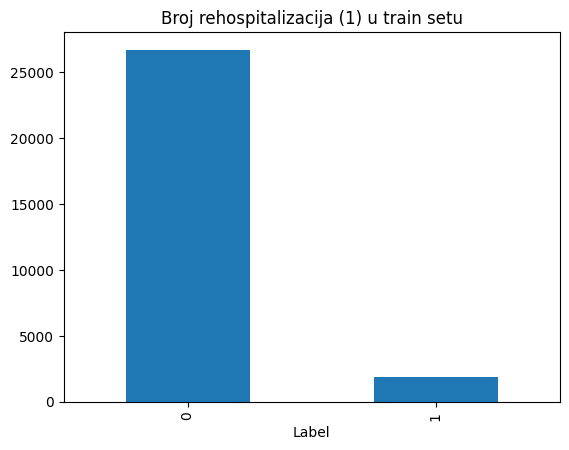

In [6]:
df.Label.value_counts().plot(kind='bar', title='Broj rehospitalizacija (1) u train setu')

In [7]:
df.Label.value_counts(normalize=True)

Label
0    0.933886
1    0.066114
Name: proportion, dtype: float64

In [8]:
df.Label.value_counts(normalize=False)

Label
0    26697
1     1890
Name: count, dtype: int64

Na gorenjem grafu vidimo da je skup podataka nebalansiran. Imamo relativno malo primjera rehospitalizacije.

## First look at test dataset

In [9]:
df_test = pd.read_csv('../data/test.csv', index_col=0)

In [10]:
df_test.shape

(7336, 276)

U skupu za testiranje imamo 7336 redaka, te 276 kolone. Dakle imamo 2 kolone više nego u skupu za treniranje.

In [11]:
df_test.head()

,AdmissionDx,AdmissionType,PreviousAdmissionDays,LOS,Age_Group,Gender,Surgery_Count,LOS_ICU,Discharge_Specialty,Dx_Discharge,Discharge_Status,Weight_Discharge,Height_Discharge,Education,Current_Work_Status,acarbose_count,acetylsalicylic_acid_count,aciclovir_count,albumin_count,allopurinol_count,alprazolam_count,alprostadil_count,aminophylline_count,amiodarone_count,amlodipine_count,amoxicillin_count,amoxicillin_and_betalactamase_inhibitor_count,ampicillin_count,ampicillin_and_betalactamase_inhibitor_count,apixaban_count,atenolol_count,atorvastatin_count,atropine_count,azithromycin_count,b03aa07_count,benzathine_benzylpenicillin_count,betamethasone_count,bisoprolol_count,bromazepam_count,butylscopolamine_count,calcium_chloride_count,carbamazepine_count,carbohydrates_count,carvedilol_count,cefalexin_count,cefazolin_count,cefepime_count,ceftazidime_count,ceftazidime_and_betalactamase_inhibitor_count,ceftriaxone_count,cefuroxime_count,chloramphenicol_count,chlorhexidine_count,chloropyramine_count,ciprofloxacin_count,clindamycin_count,clonazepam_count,clopidogrel_count,clotrimazole_count,coagulation_factor_ix_ii_vii_and_x_in_combination_count,coagulation_factor_viia_count,colchicine_count,colecalciferol_count,colistin_count,combinations_count,dabigatran_etexilate_count,dapagliflozin_count,dexamethasone_count,dexamethasone_and_antiinfectives_count,dexmedetomidine_count,diazepam_count,diclofenac_count,diltiazem_count,dobutamine_count,doxazosin_count,electrolytes_count,empagliflozin_count,enoxaparin_count,epinephrine_count,eplerenone_count,erythromycin_count,escitalopram_count,esomeprazole_count,etomidate_count,exemestane_count,fentanyl_count,ferric_oxide_polymaltose_complexes_count,ferrous_fumarate_count,flucloxacillin_count,fluconazole_count,flumazenil_count,folic_acid_count,fondaparinux_count,fosfomycin_count,furosemide_count,gentamicin_count,gliclazide_count,glimepiride_count,gliquidone_count,glyceryl_trinitrate_count,haloperidol_count,heparin_count,hydrocortisone_count,ibuprofen_count,indapamide_count,indometacin_count,insulin_aspart_count,insulin_glargine_count,insulin_human_count,iodixanol_count,iohexol_count,ipratropium_bromide_count,isosorbide_dinitrate_count,isosorbide_mononitrate_count,ivabradine_count,ketamine_count,ketoprofen_count,lacidipine_count,lactulose_count,lamotrigine_count,lercanidipine_count,levetiracetam_count,levobupivacaine_count,levodopa_and_decarboxylase_inhibitor_count,levofloxacin_count,levothyroxine_sodium_count,lidocaine_count,linagliptin_count,linezolid_count,lisinopril_count,loperamide_count,loratadine_count,lorazepam_count,losartan_count,losartan_and_diuretics_count,macrogol_combinations_count,mannitol_count,memantine_count,meropenem_count,mesalazine_count,metamizole_sodium_count,metformin_count,metformin_and_alogliptin_count,metformin_and_empagliflozin_count,metformin_and_vildagliptin_count,methylphenobarbital_count,methylprednisolone_count,metildigoxin_count,metoclopramide_count,metoprolol_count,metronidazole_count,miconazole_count,midazolam_count,mirtazapine_count,mometasone_count,montelukast_count,morphine_count,moxifloxacin_count,moxonidine_count,mupirocin_count,n02bf01_count,n02bf02_count,nadroparin_count,naloxone_count,nebivolol_count,neostigmine_count,nitrazepam_count,nitrofurantoin_count,norepinephrine_count,norfloxacin_count,octreotide_count,omega3triglycerides_incl_other_esters_and_acids_count,ondansetron_count,organoheparinoid_count,oseltamivir_count,oxazepam_count,pantoprazole_count,paracetamol_count,paroxetine_count,perindopril_count,perindopril_amlodipine_and_indapamide_count,perindopril_and_amlodipine_count,perindopril_and_diuretics_count,pethidine_count,phenobarbital_count,pholcodine_count,phytomenadione_count,piperacillin_and_betalactamase_inhibitor_count,potassium_chloride_count,potassium_different_salts_in_combination_count,prasugrel_count,prednisone_count,promazine_count,propafenone_count,propofol_count,protamine_count,quetiapine_count,rabeprazole_count,ramipril_count,ramipril_an

In [12]:
df_test.isna().sum()

AdmissionDx                                                  30
AdmissionType                                                 0
PreviousAdmissionDays                                         0
LOS                                                           0
Age_Group                                                     0
Gender                                                        0
Surgery_Count                                                 0
LOS_ICU                                                       0
Discharge_Specialty                                           0
Dx_Discharge                                                  0
Discharge_Status                                              0
Weight_Discharge                                              0
Height_Discharge                                              0
Education                                                   242
Current_Work_Status                                          28
acarbose_count                          

U test setu kolona Education ima znatno vise nedostajucih vrijednosti nego u train setu. 2 dodatne kolone u usporedbi s train setom su Probability_0 i Probability_1. To su kolone koje trebamo sami popuniti i predati (isto i s Label kolonom).

In [13]:
[c for c in df.columns if c not in df_test.columns]

[]

Sve kolone u skupu za treniranje se nalaze i u skupu za testiranje.

In [14]:
[c for c in df_test.columns if c not in df.columns]

['Probability_0', 'Probability_1']

Kolone 'Probability_0' i 'Probability_1' iz skupa za testiranje se ne nalaze u skupu za treniranje.

## Pregled "sparse" iliti rijetkih kolona (ljekovi / dijagnoze)

In [14]:
sparse_cols = list(df.columns)[16:] # All columns after 'Label' which is the 16th column

In [15]:
len(sparse_cols)

258

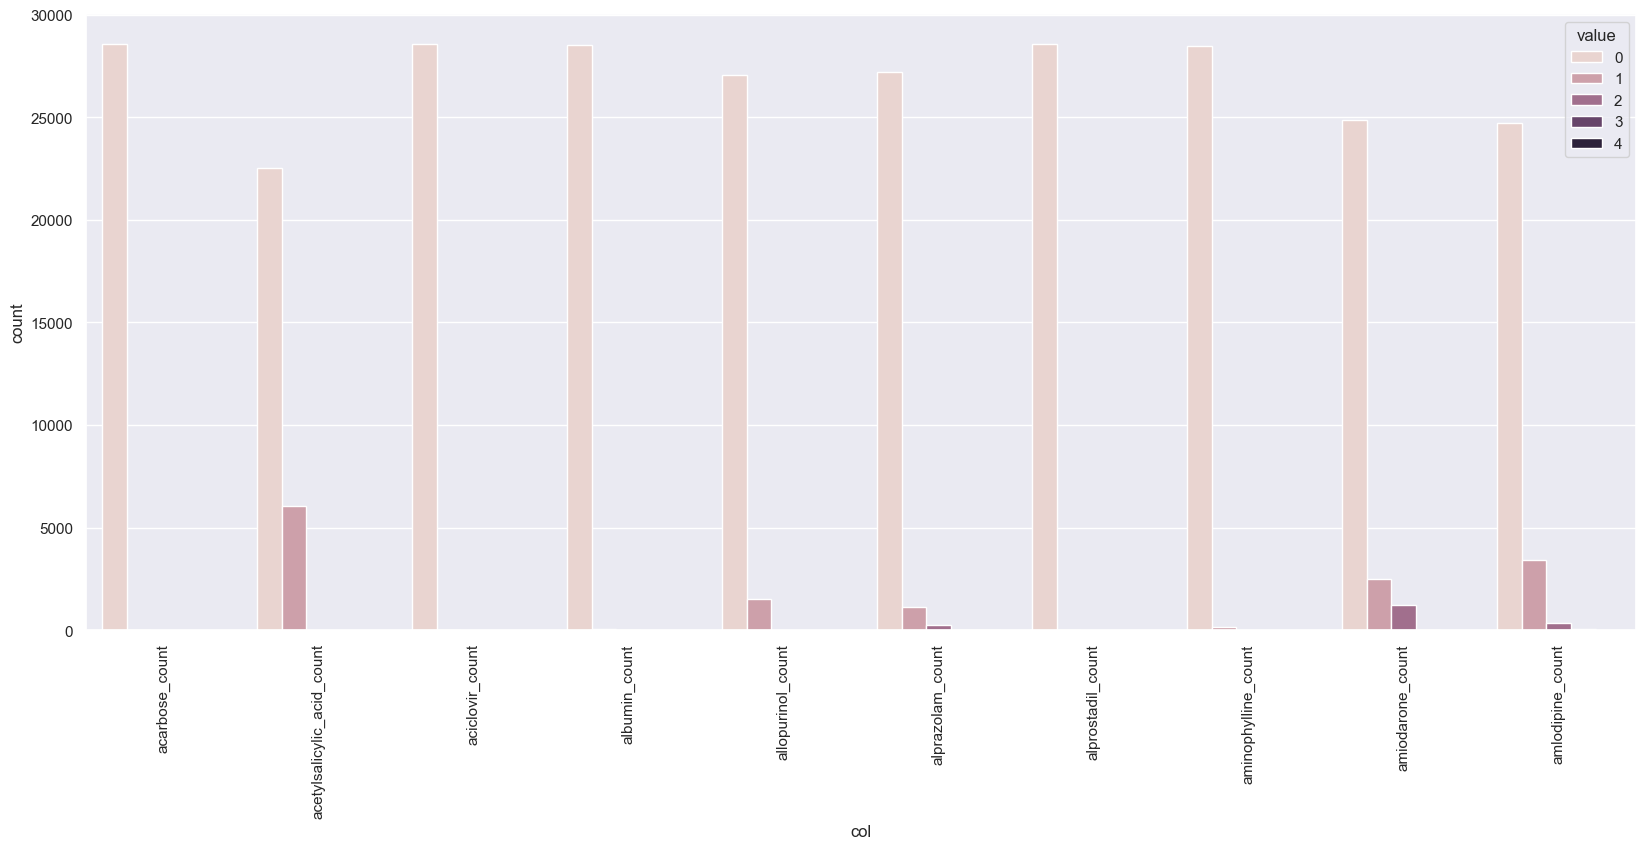

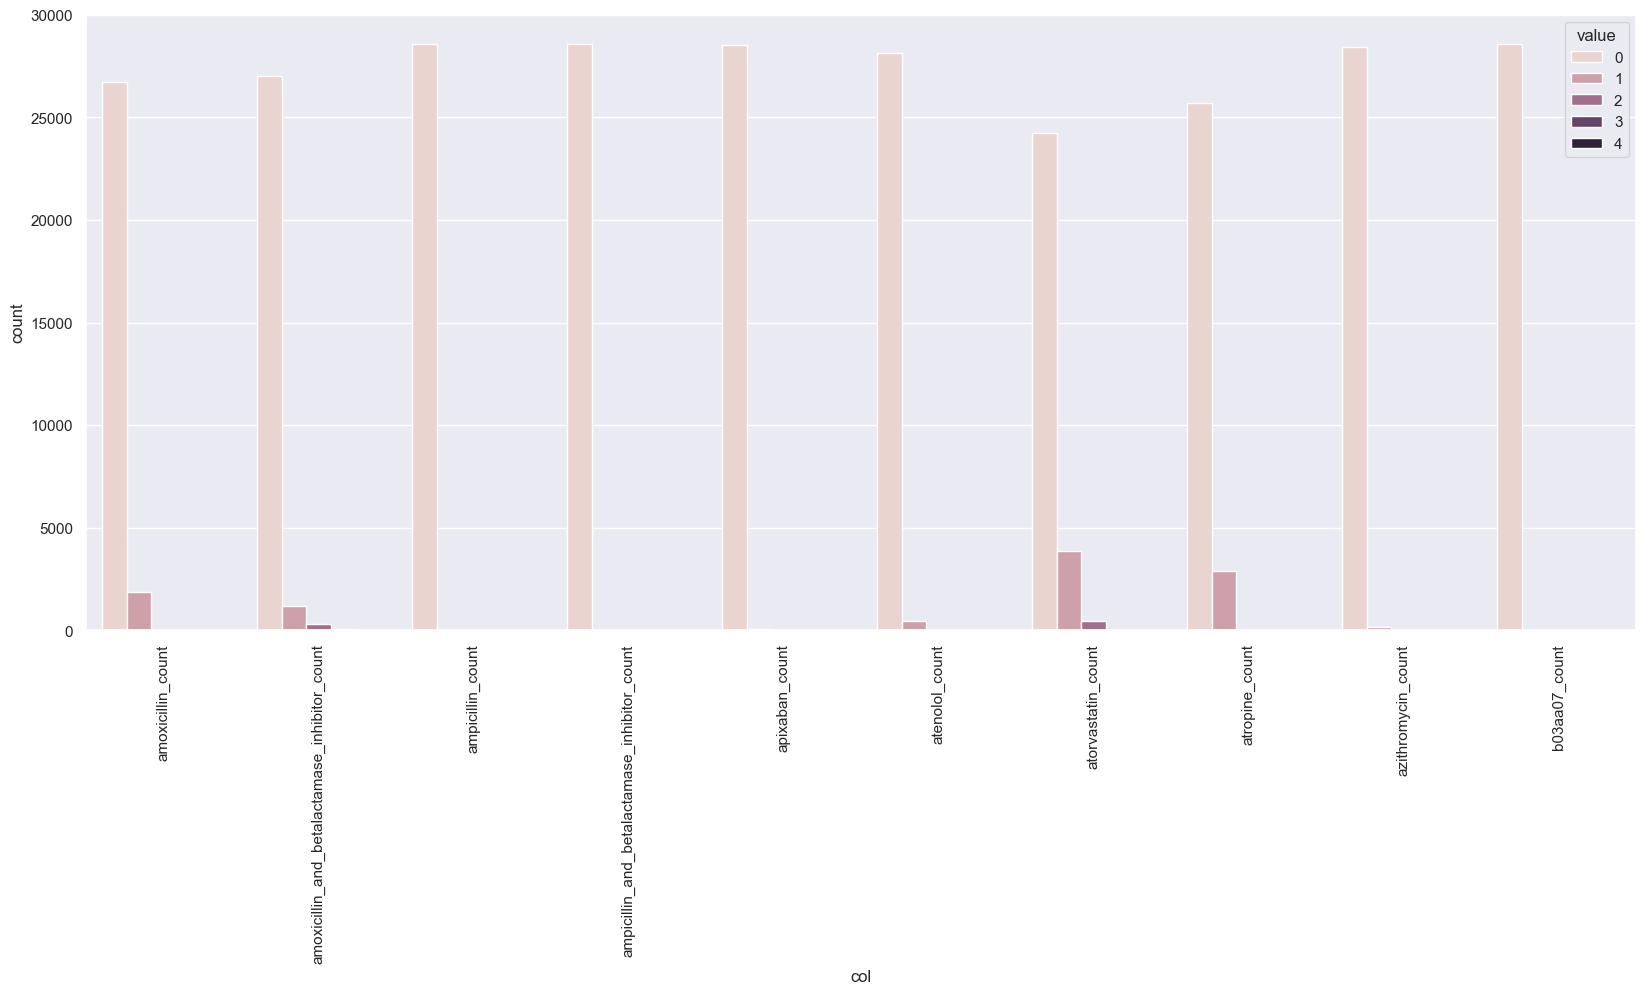

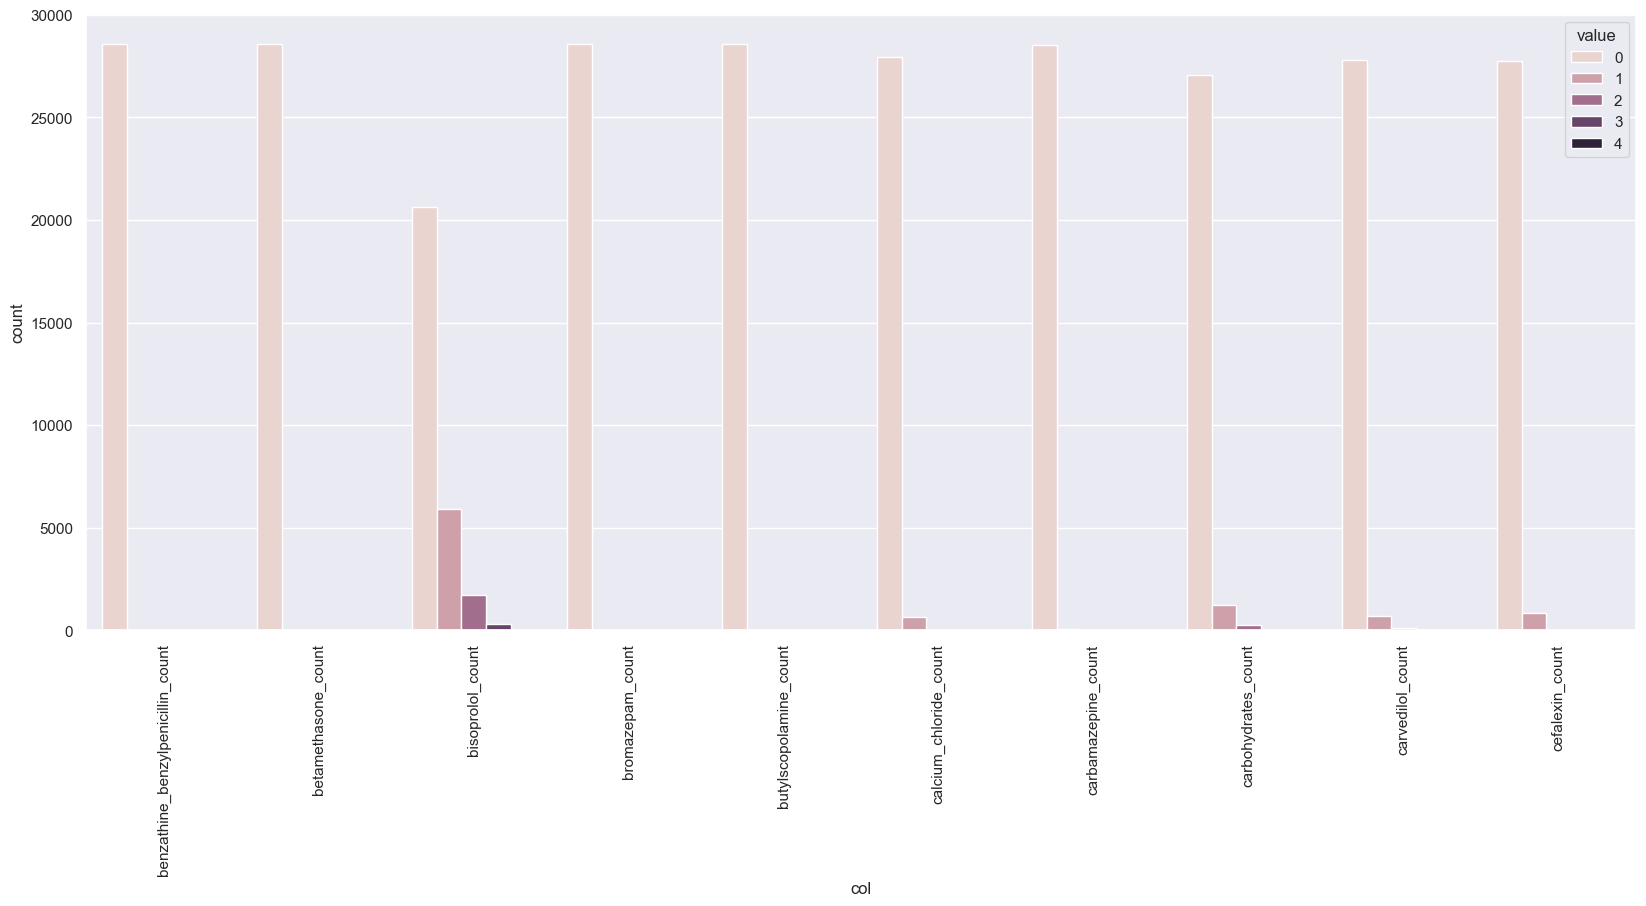

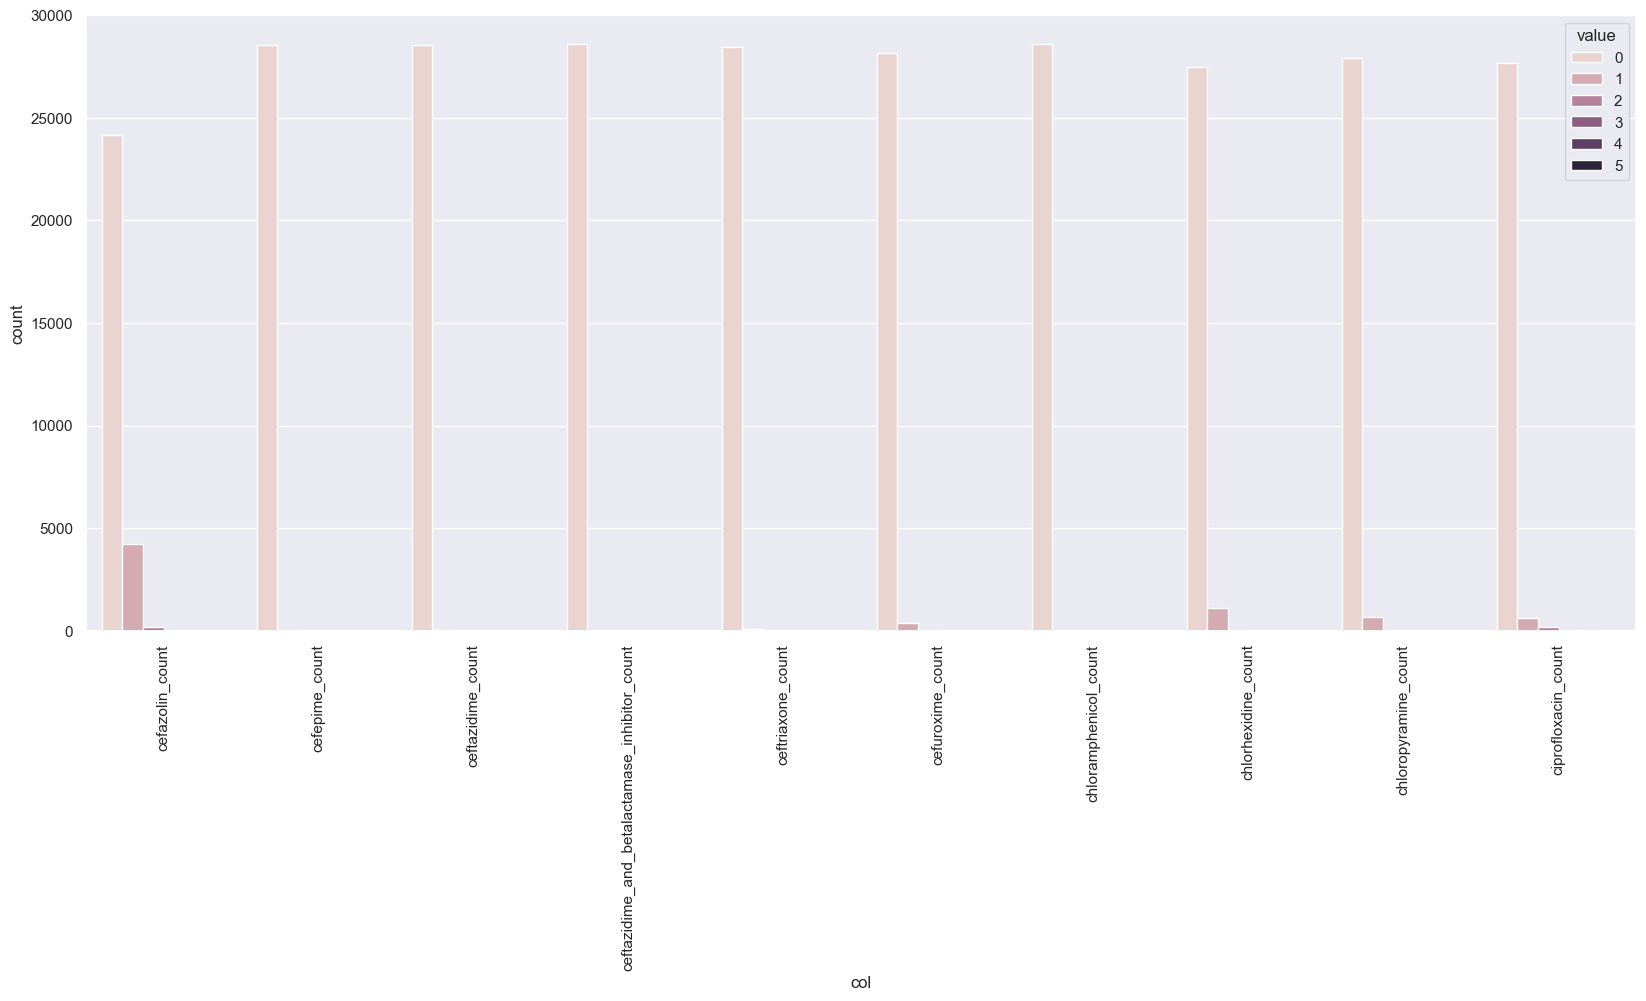

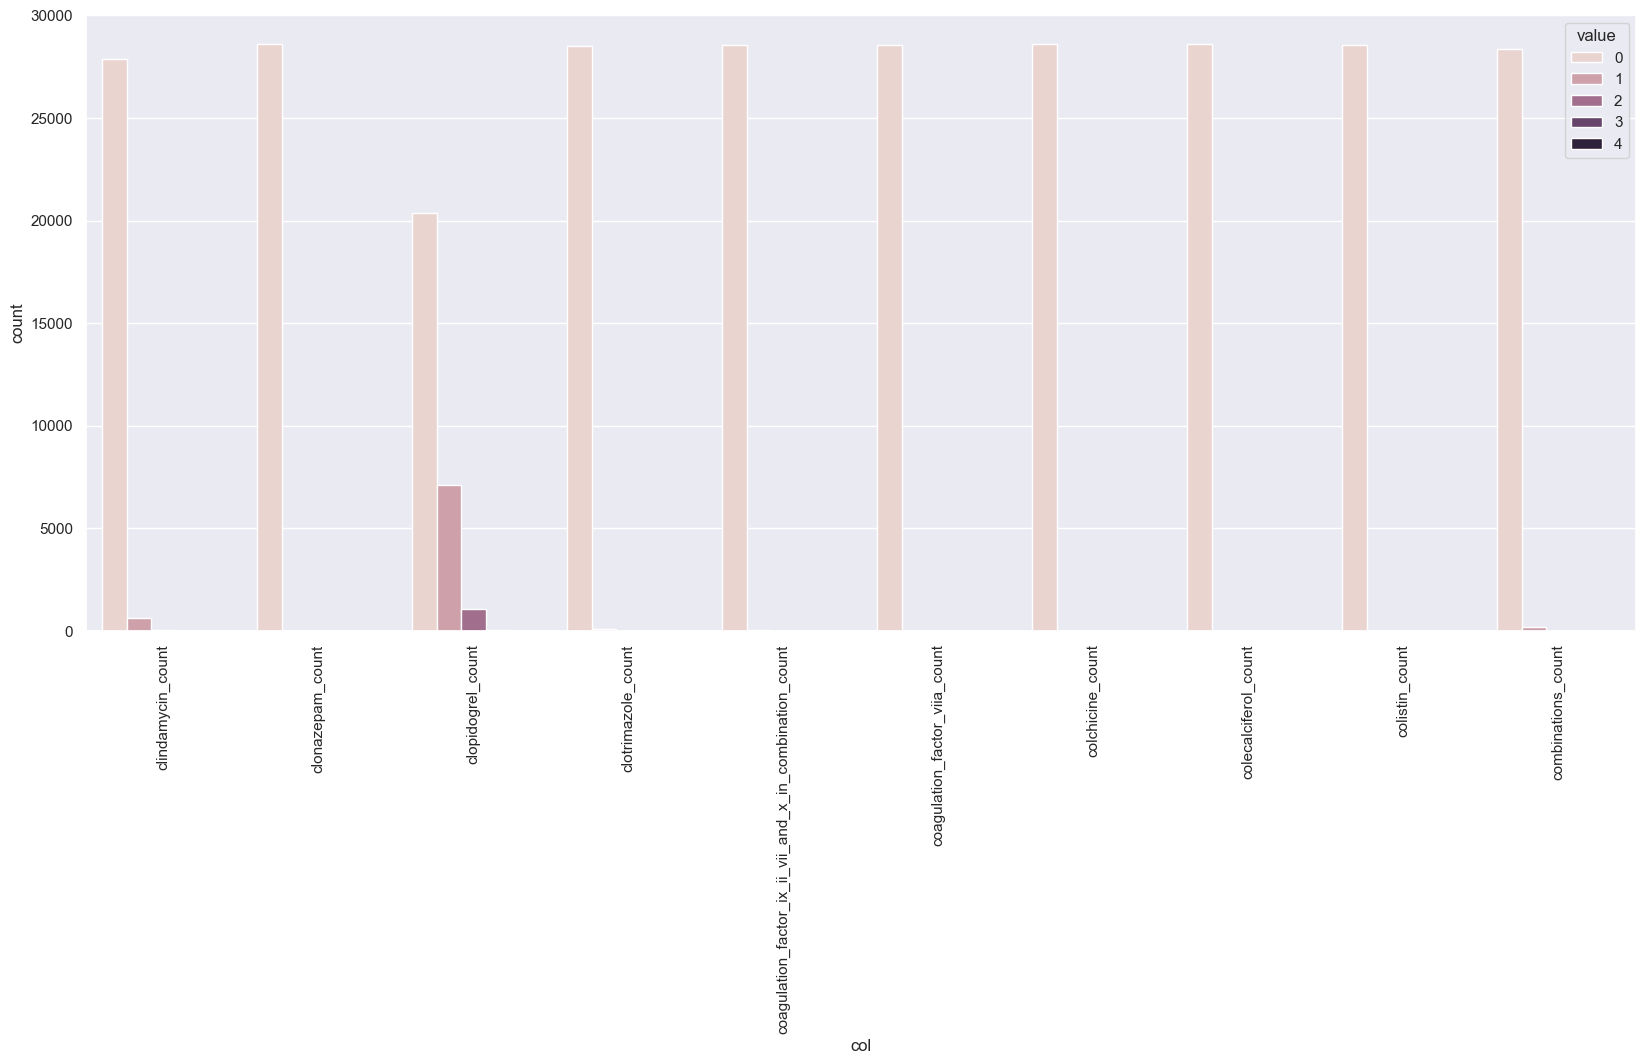

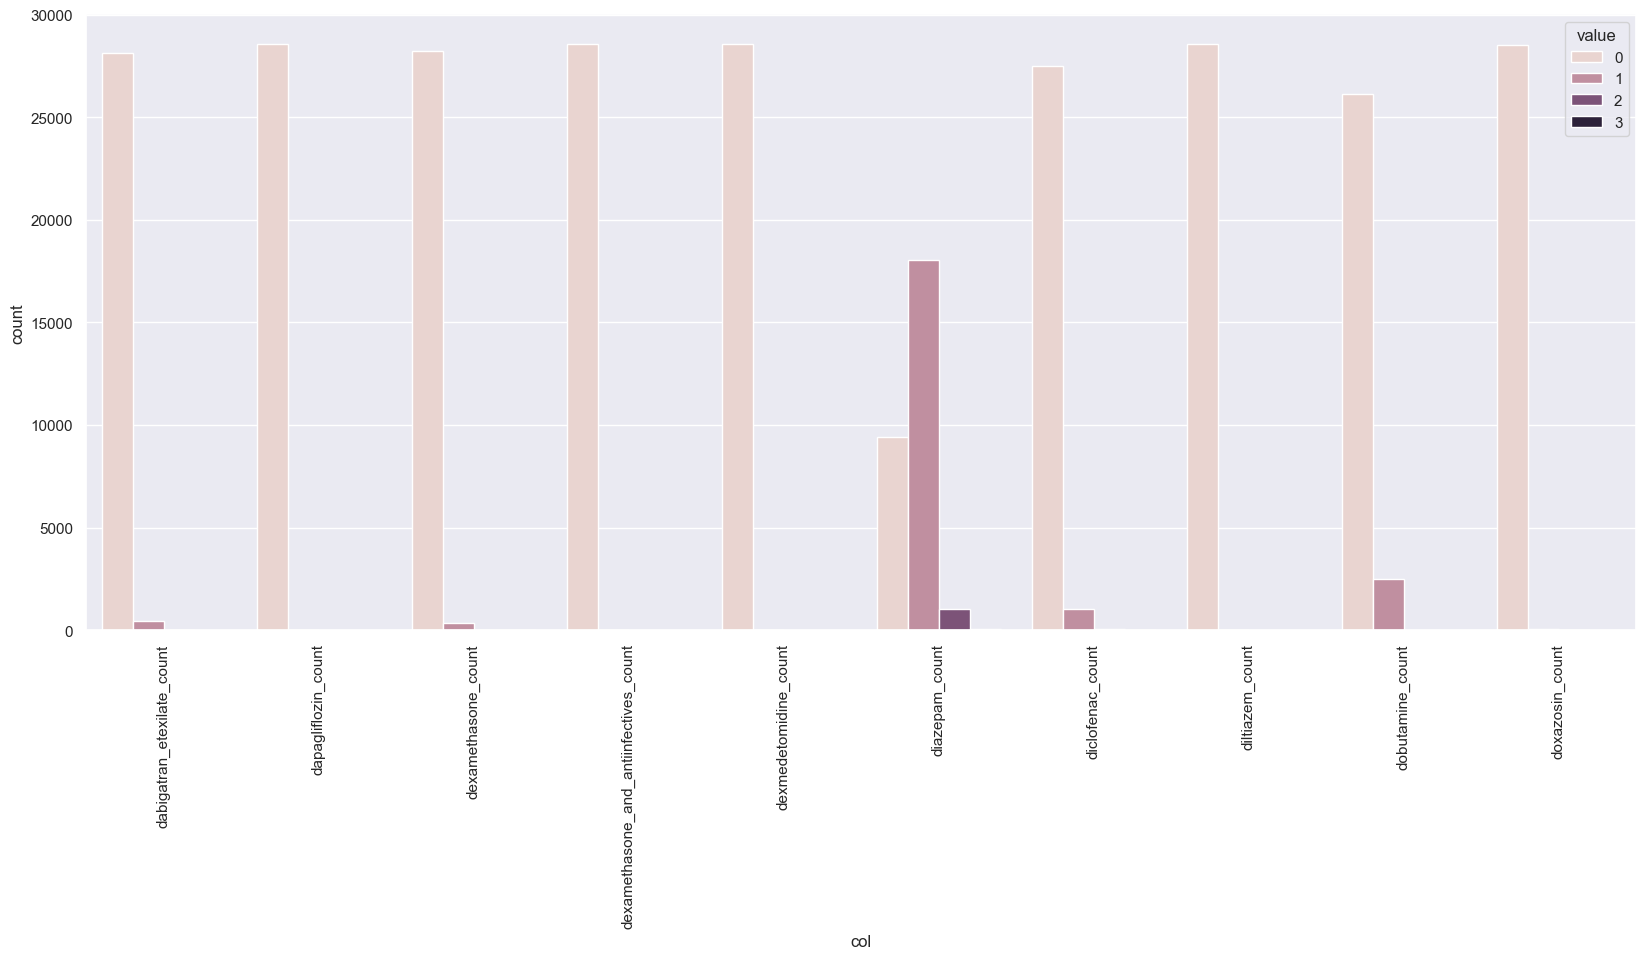

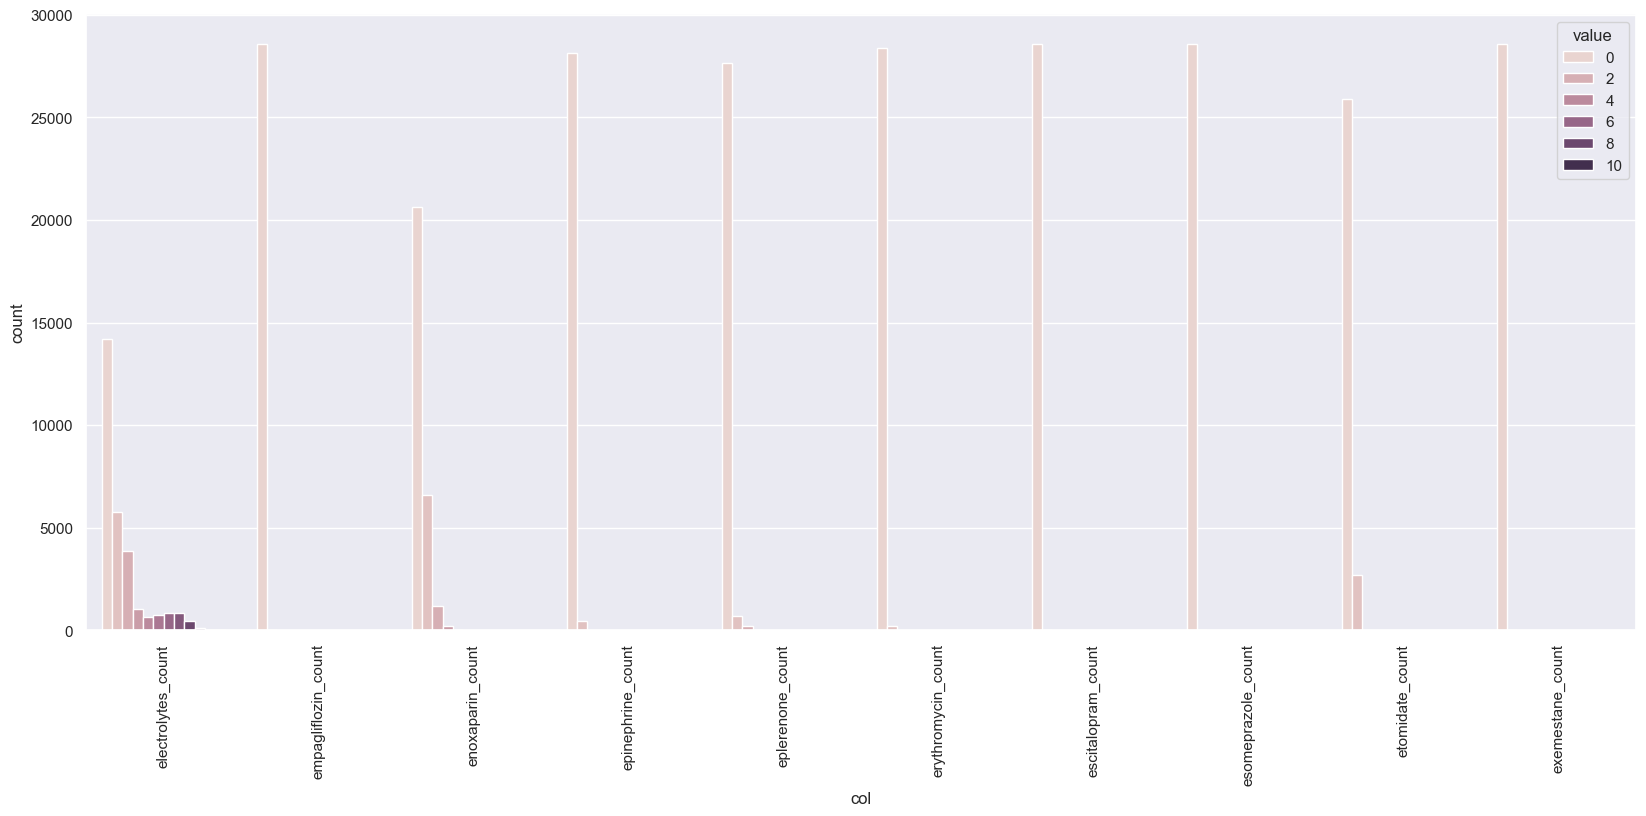

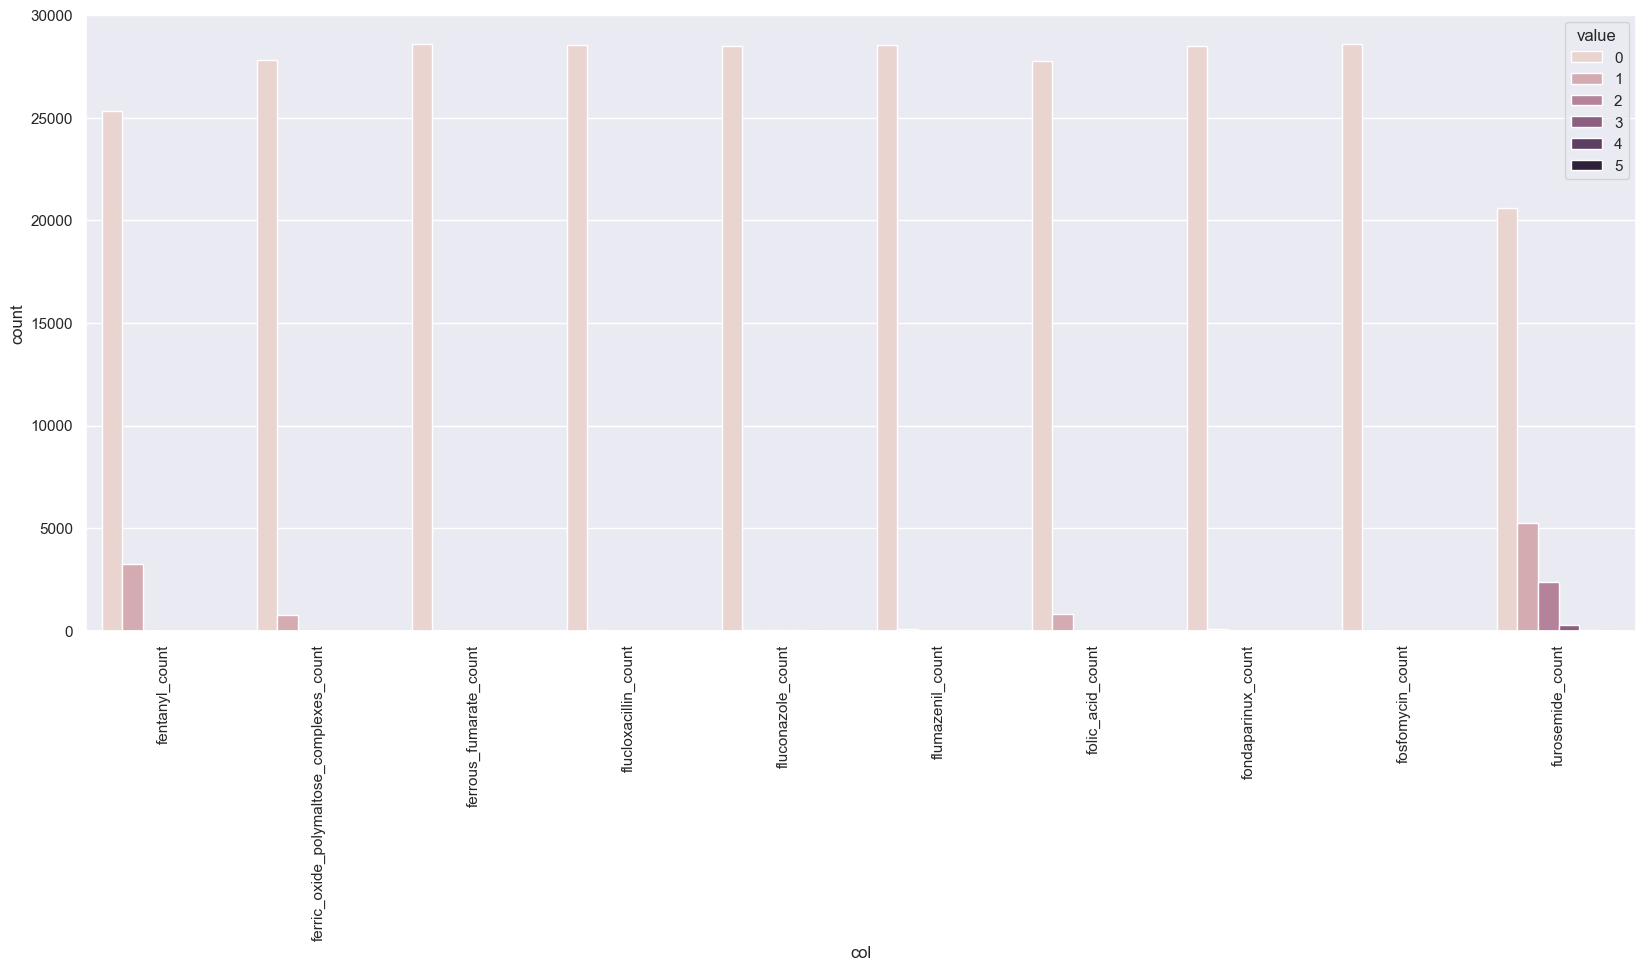

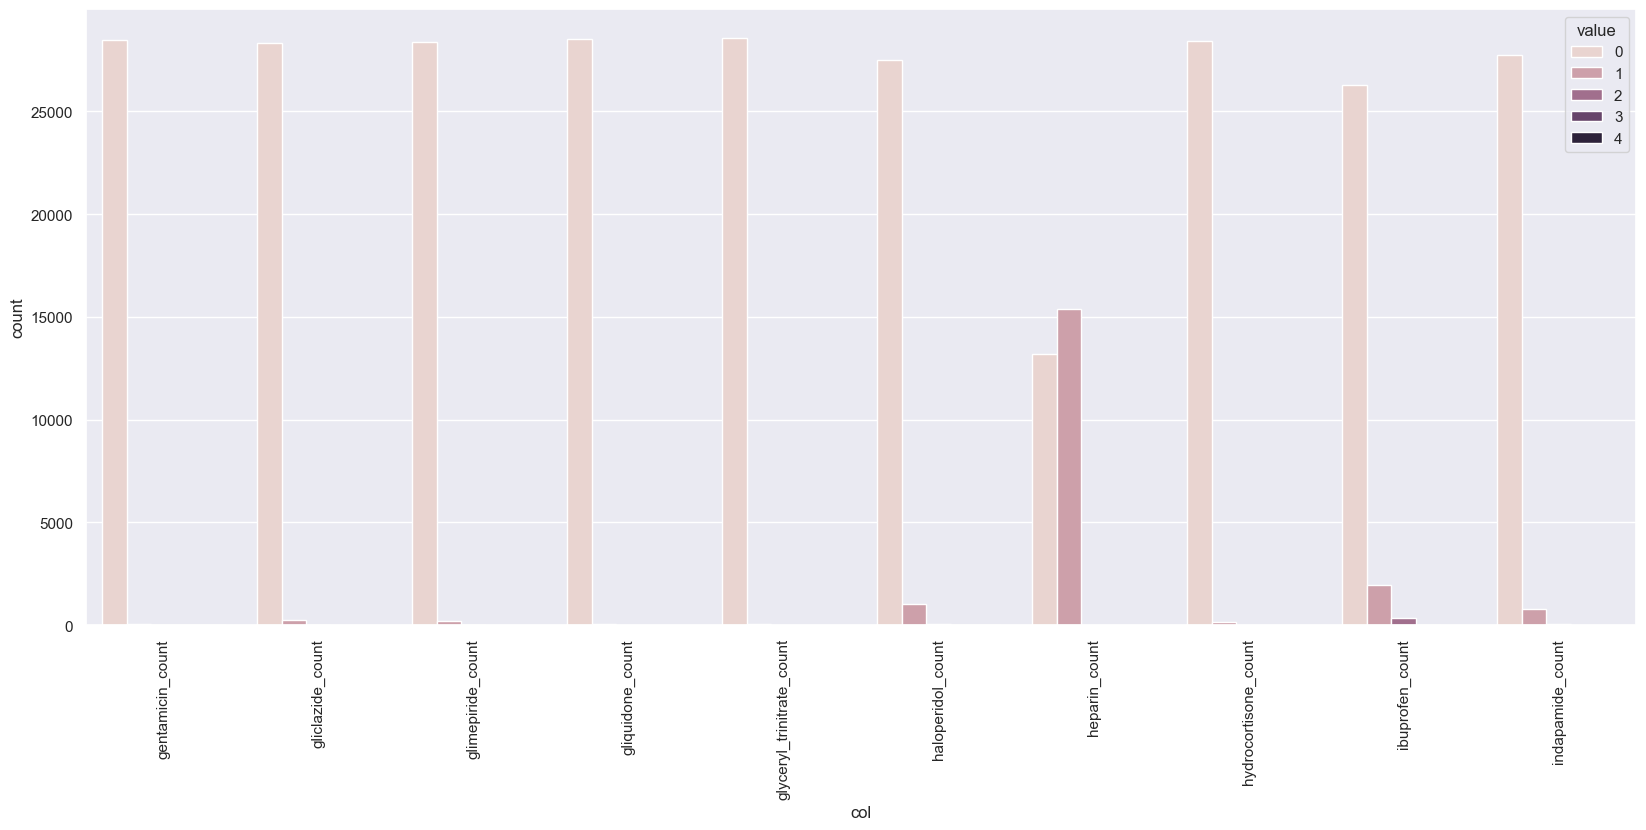

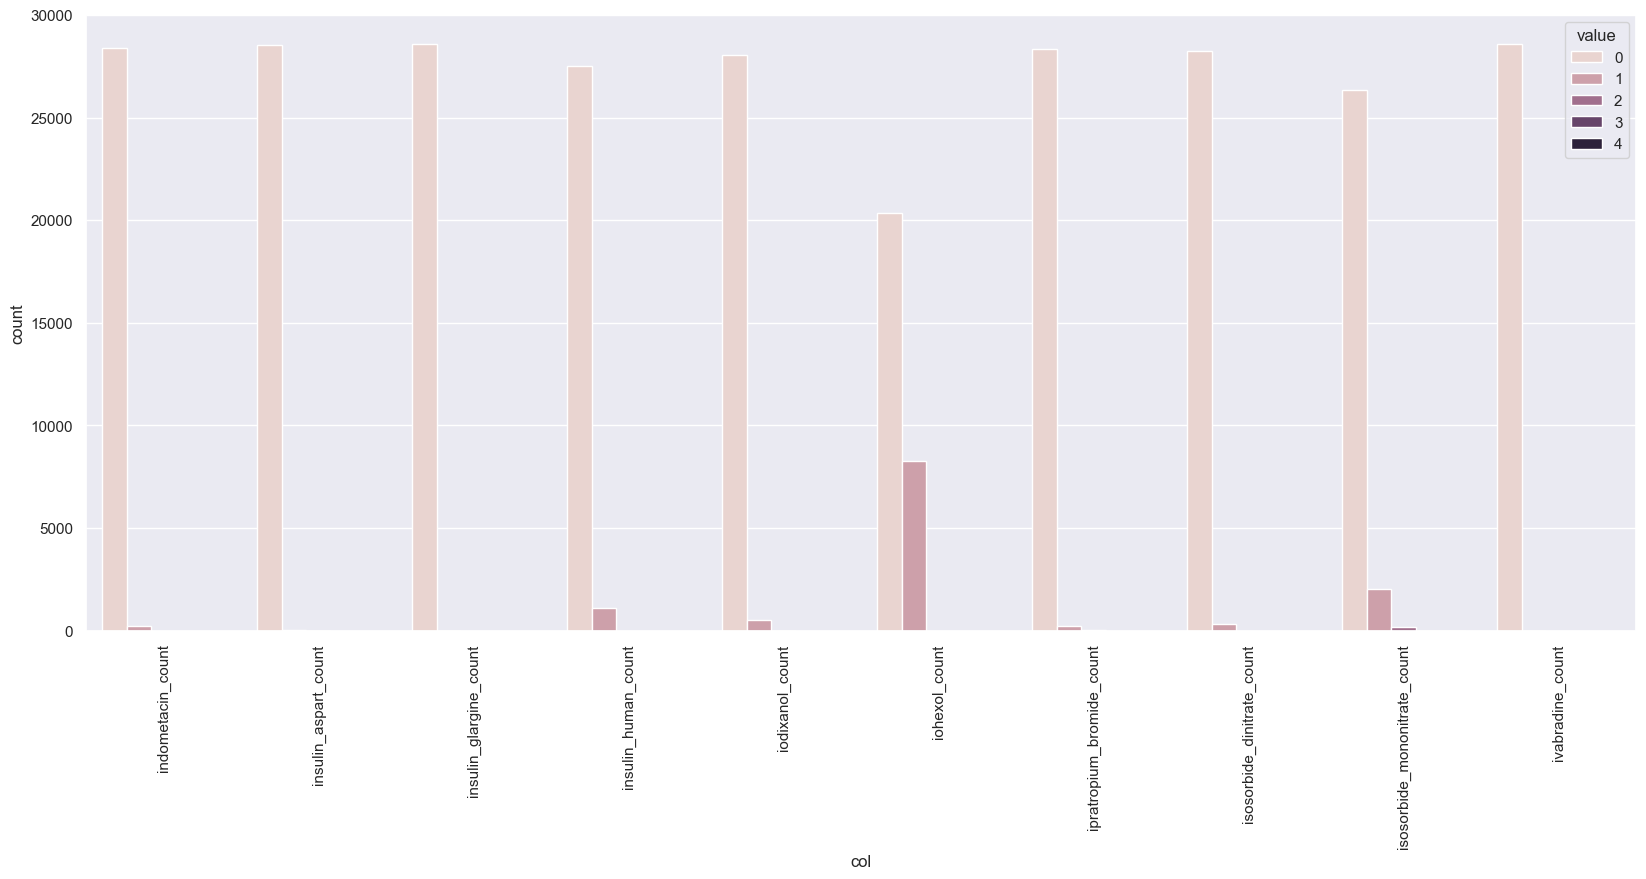

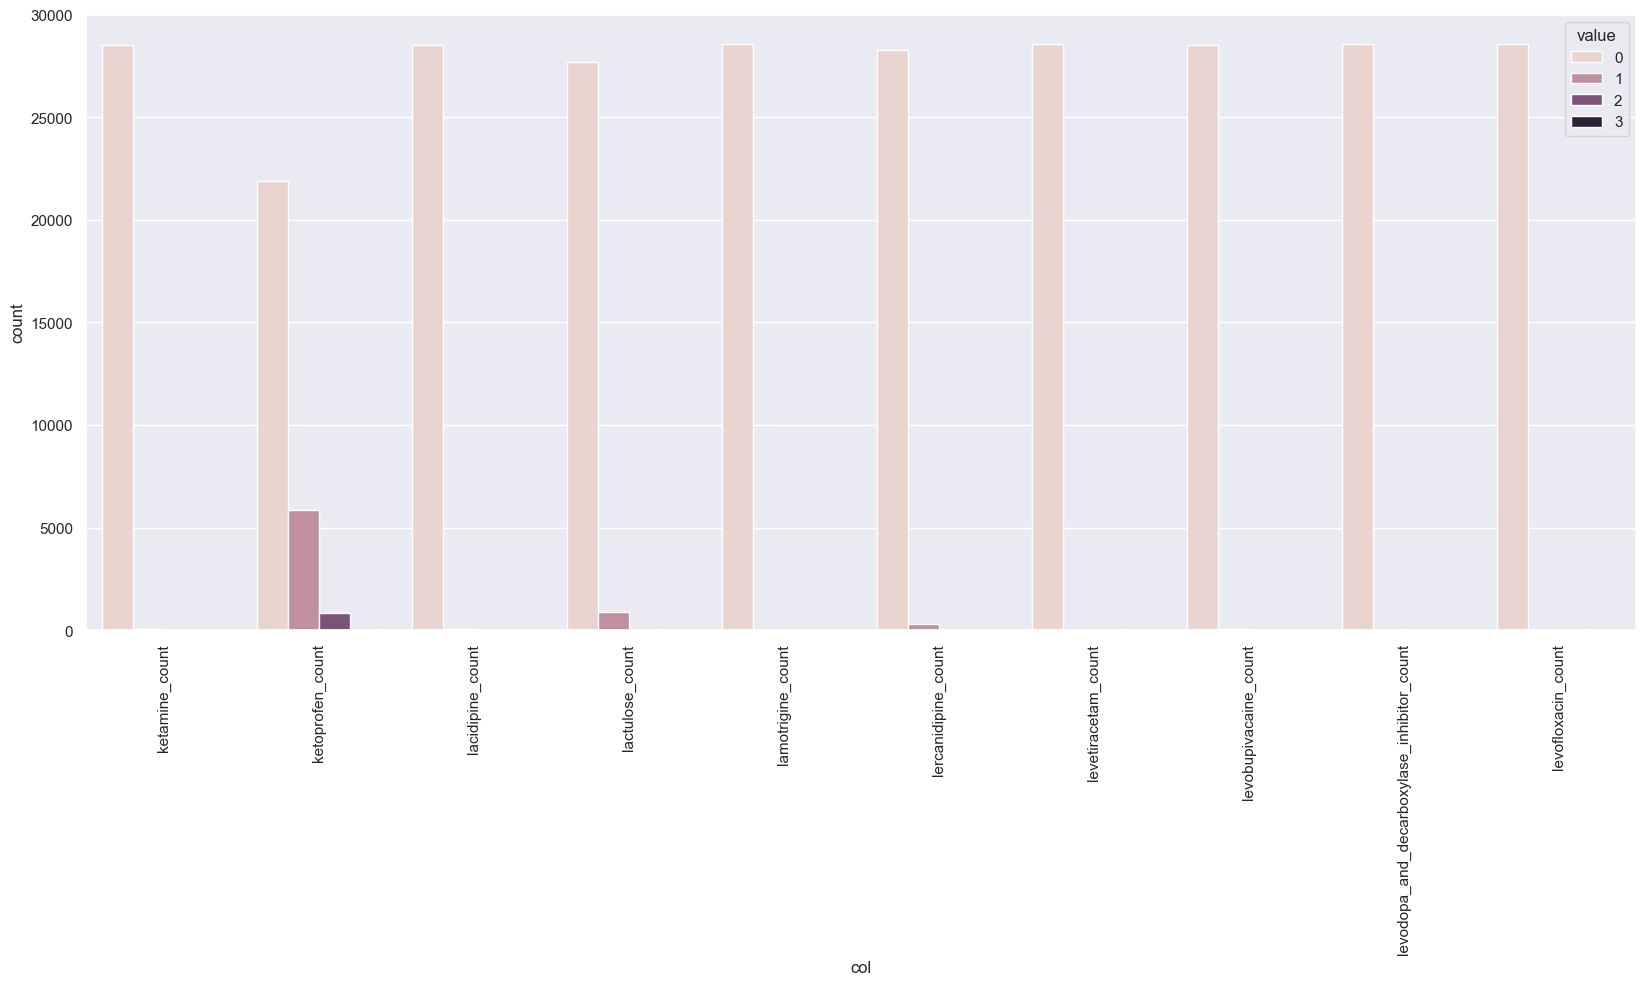

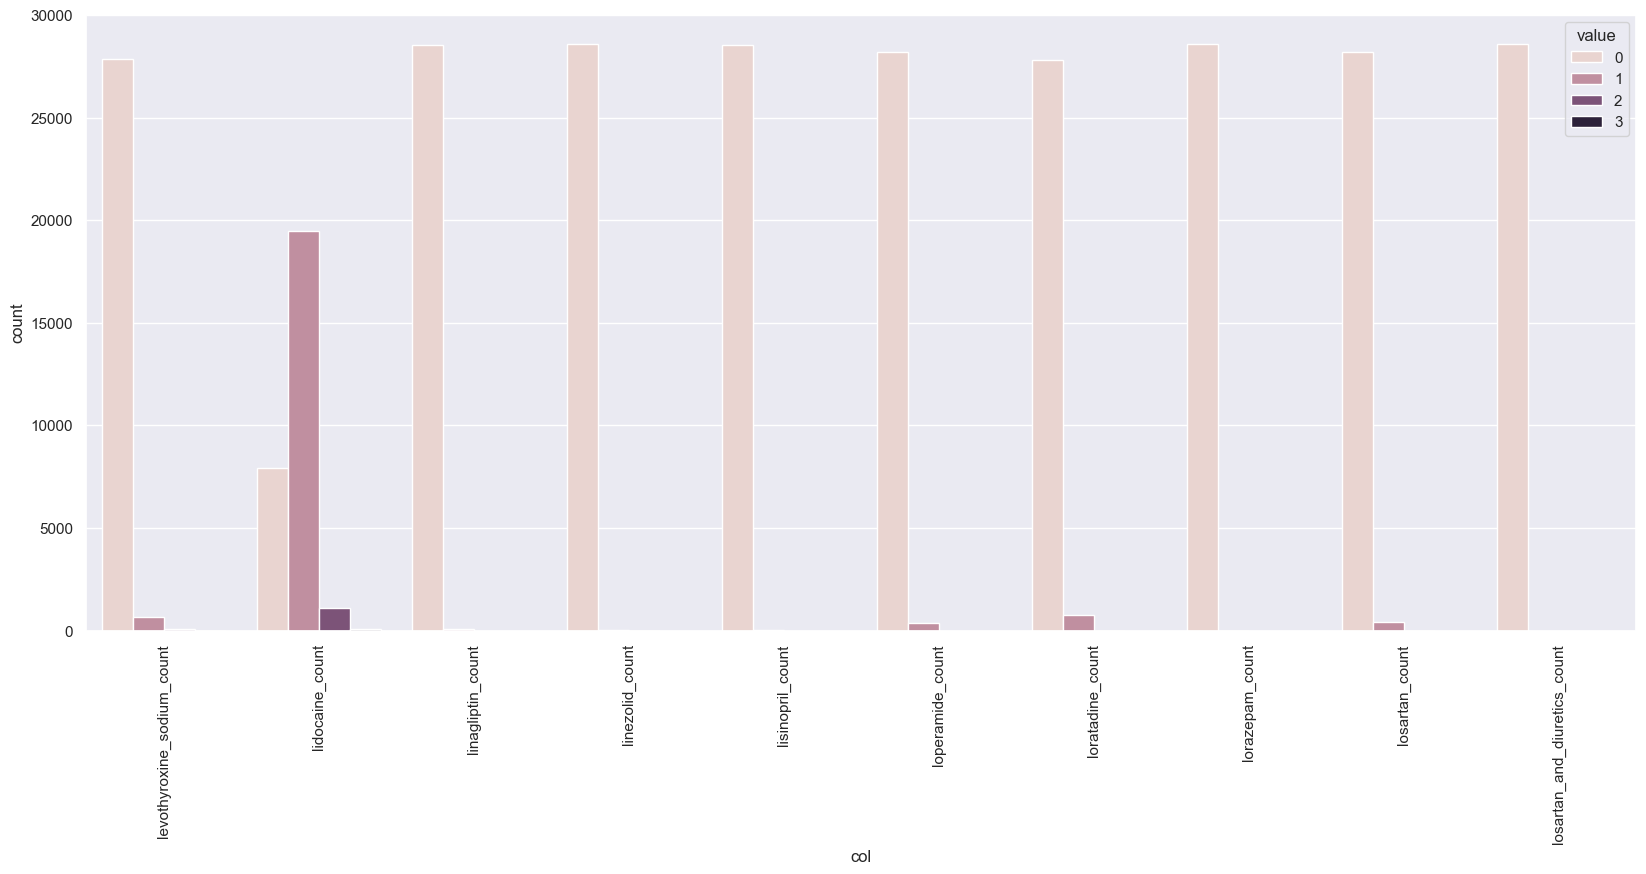

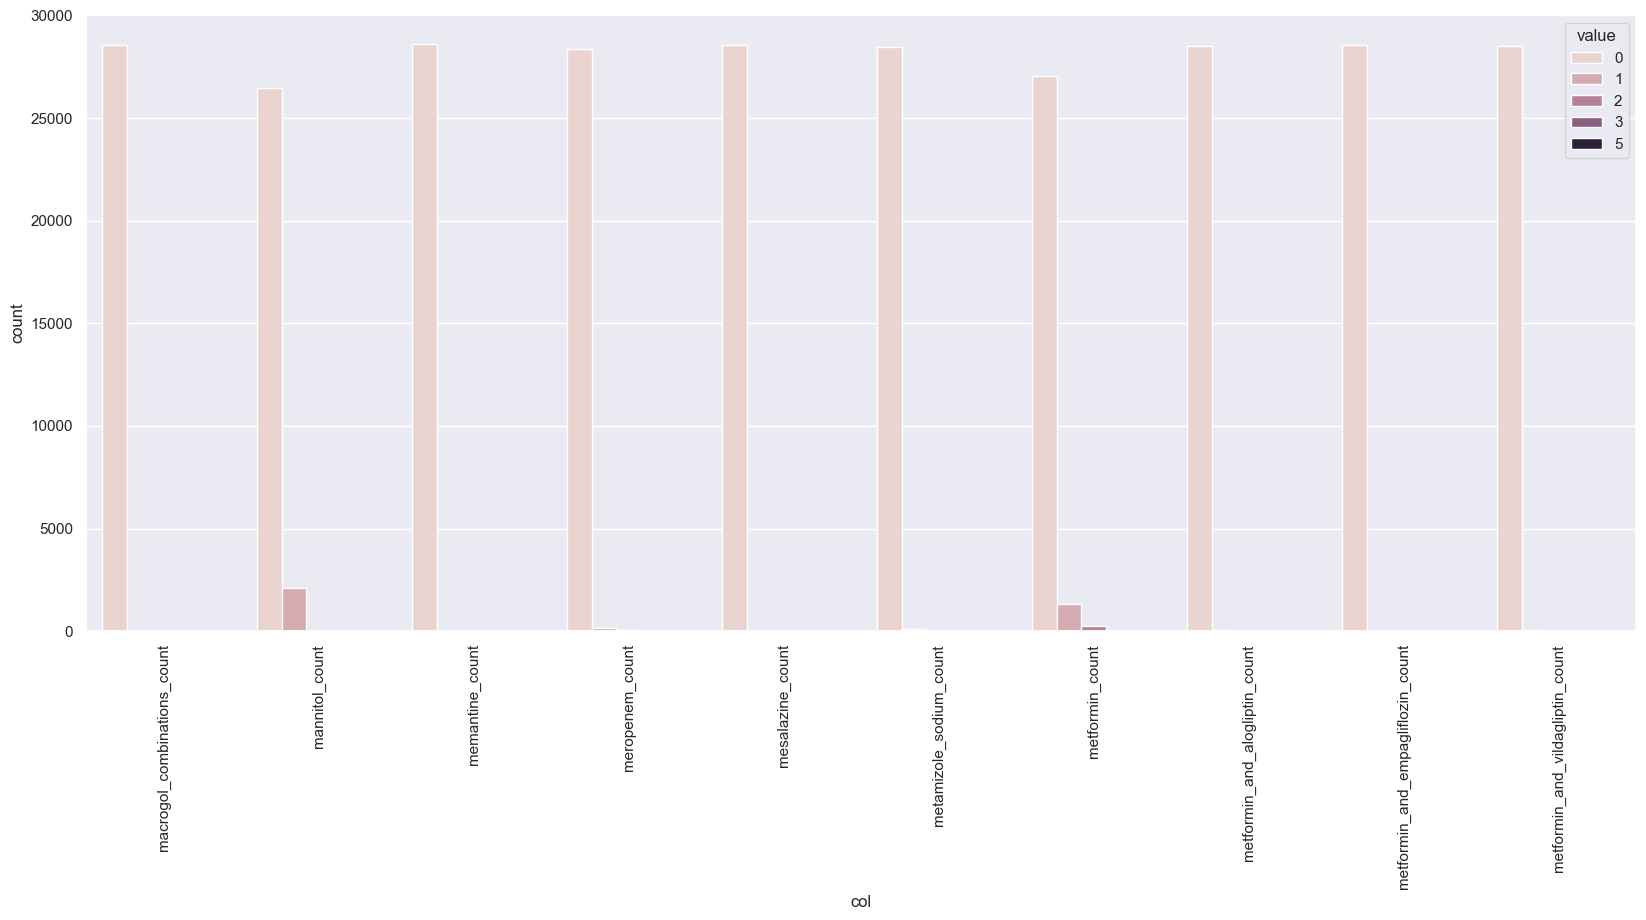

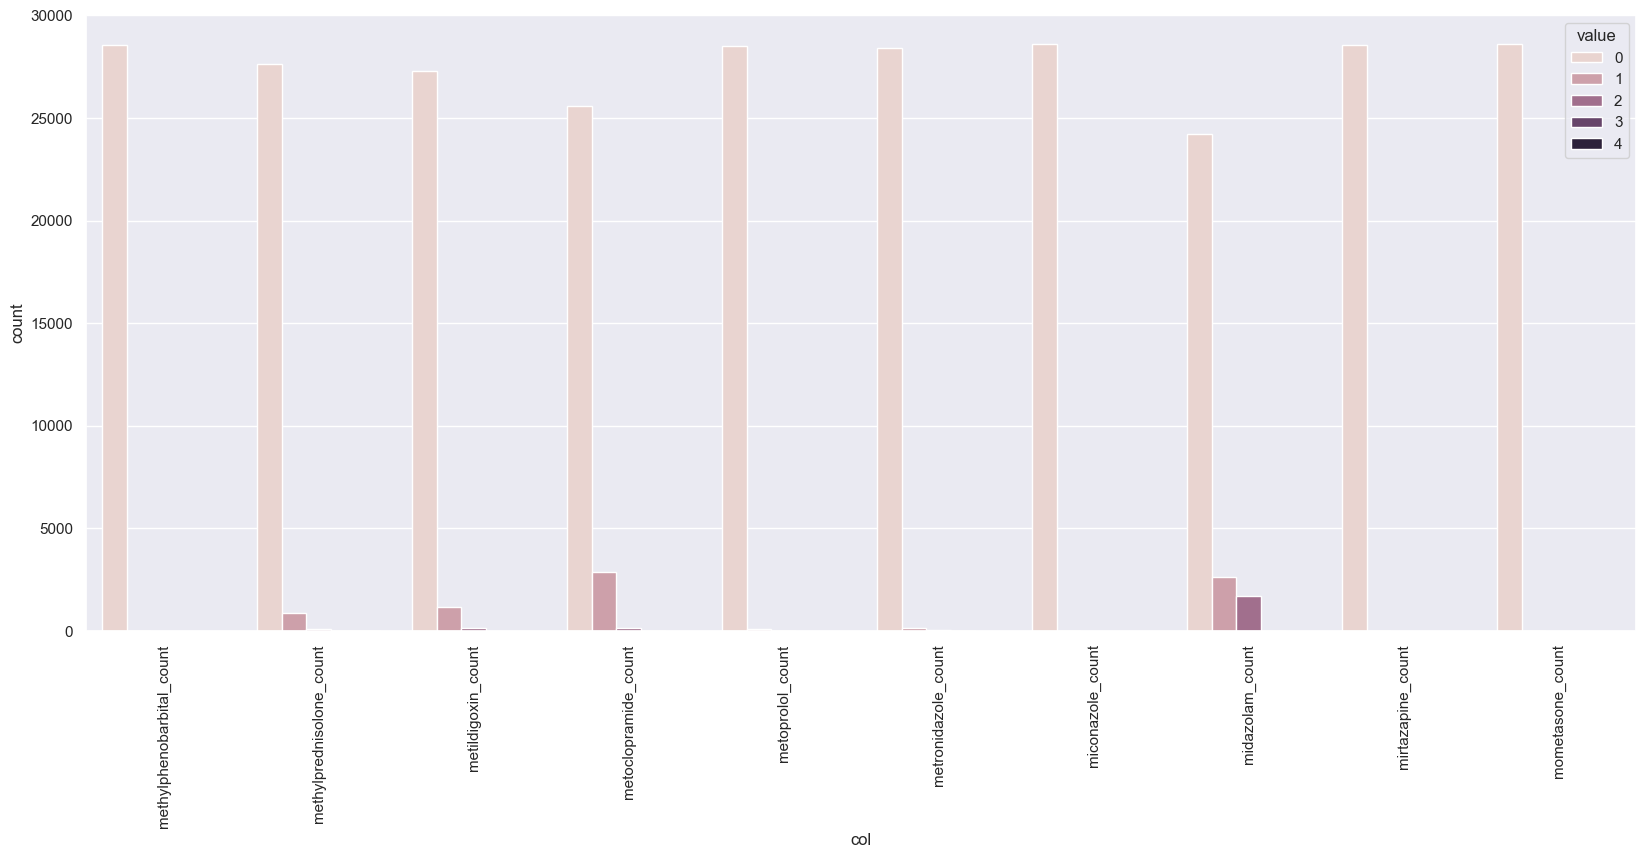

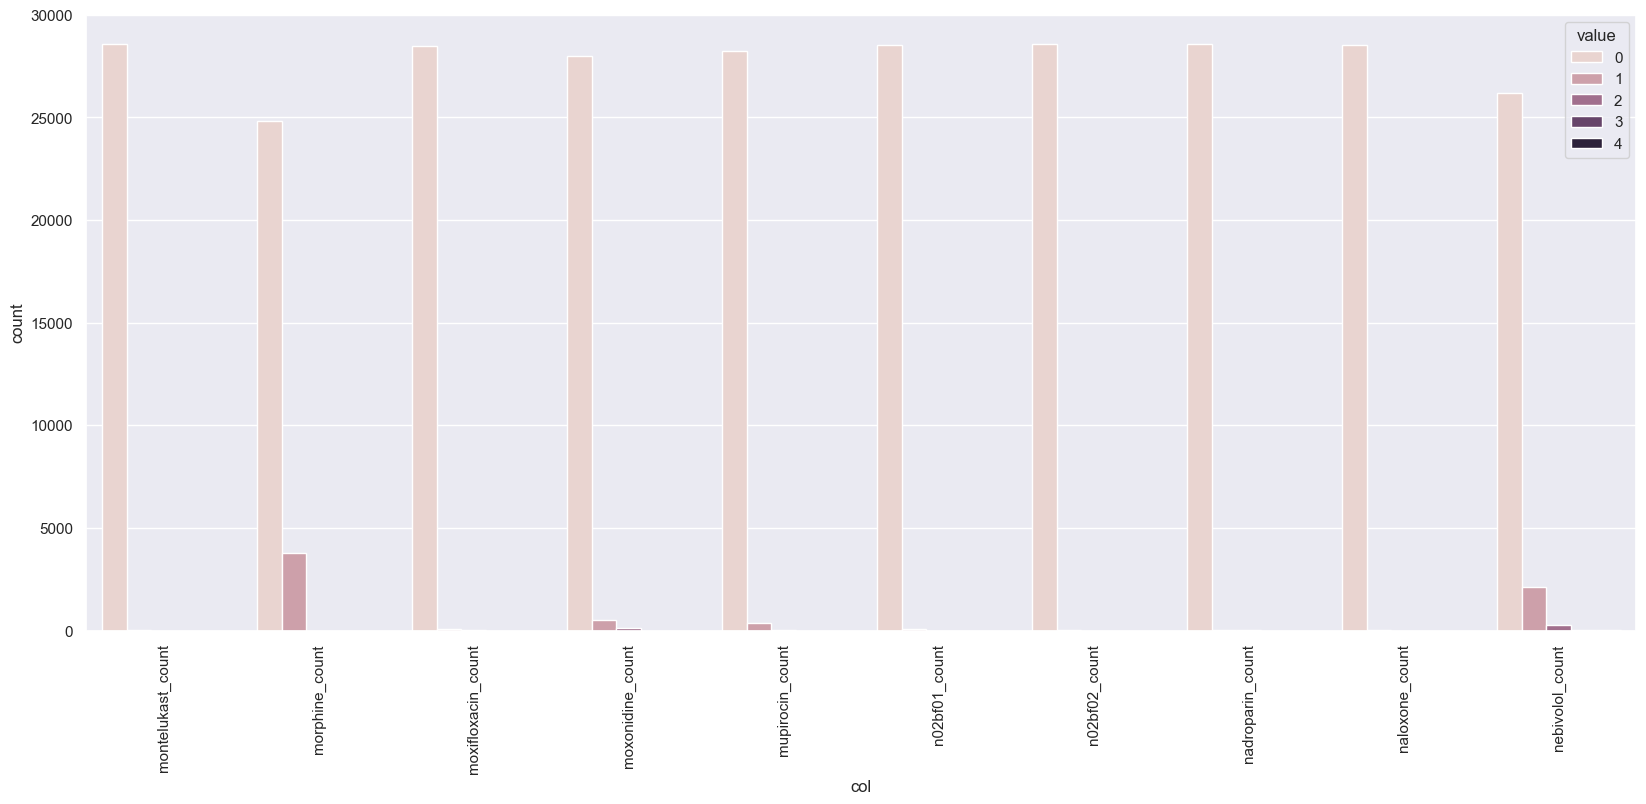

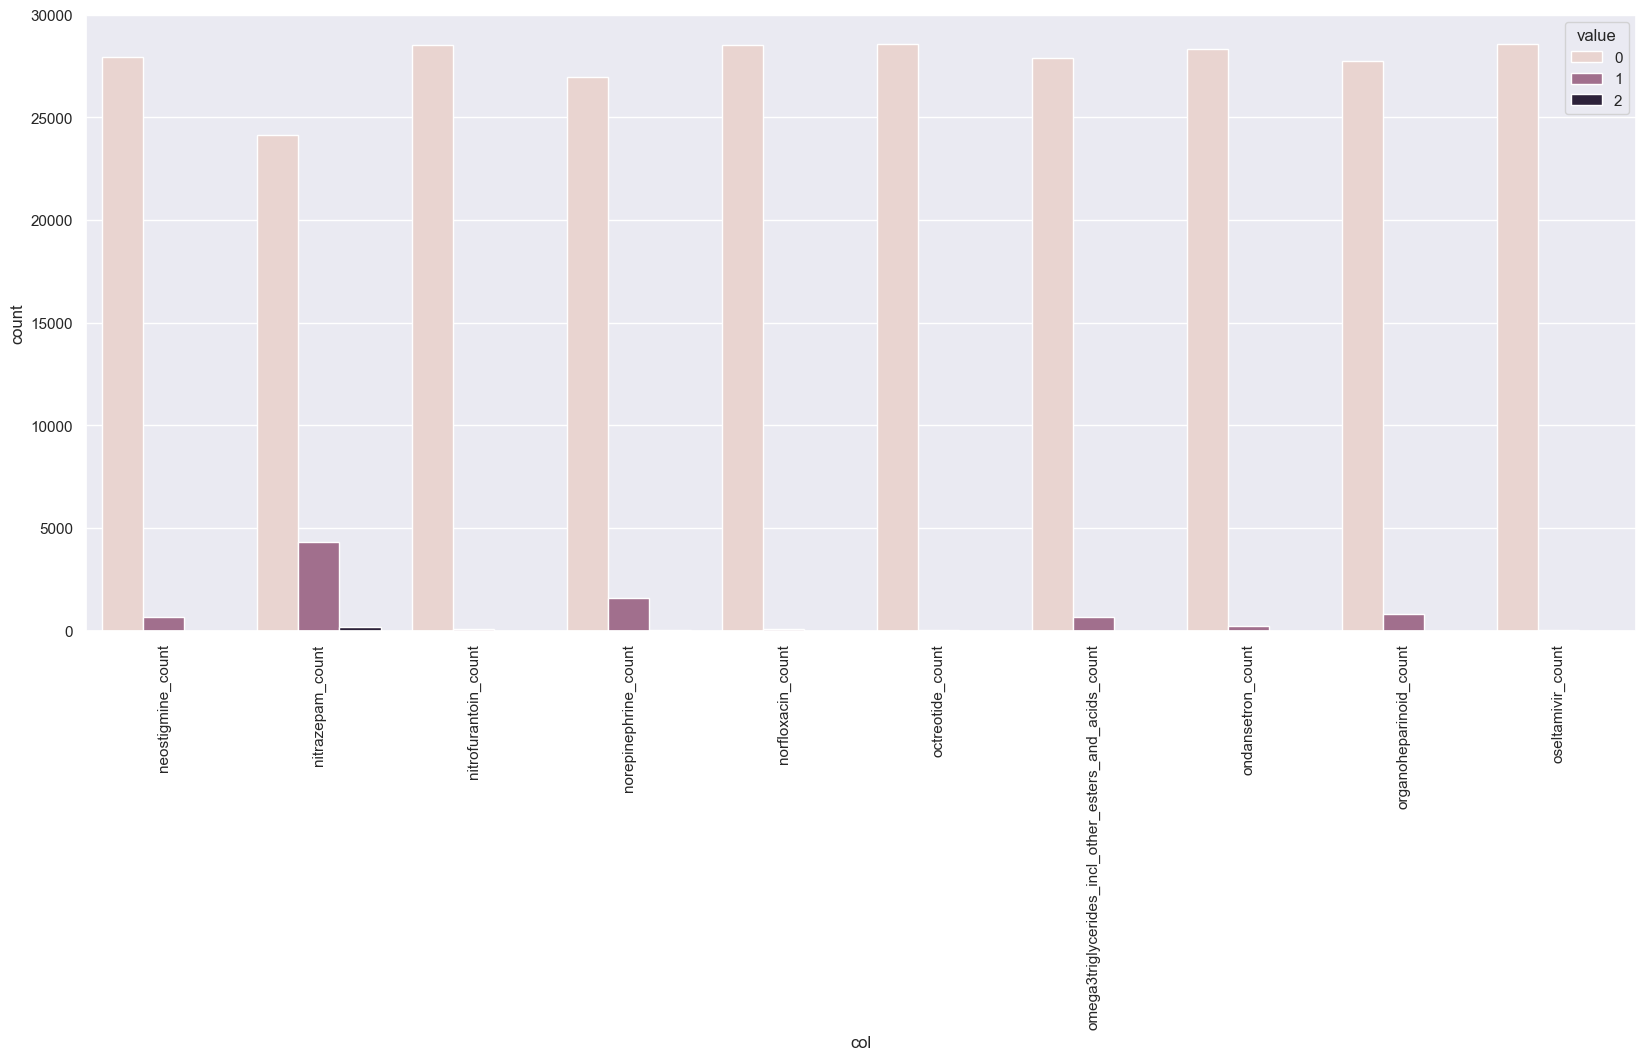

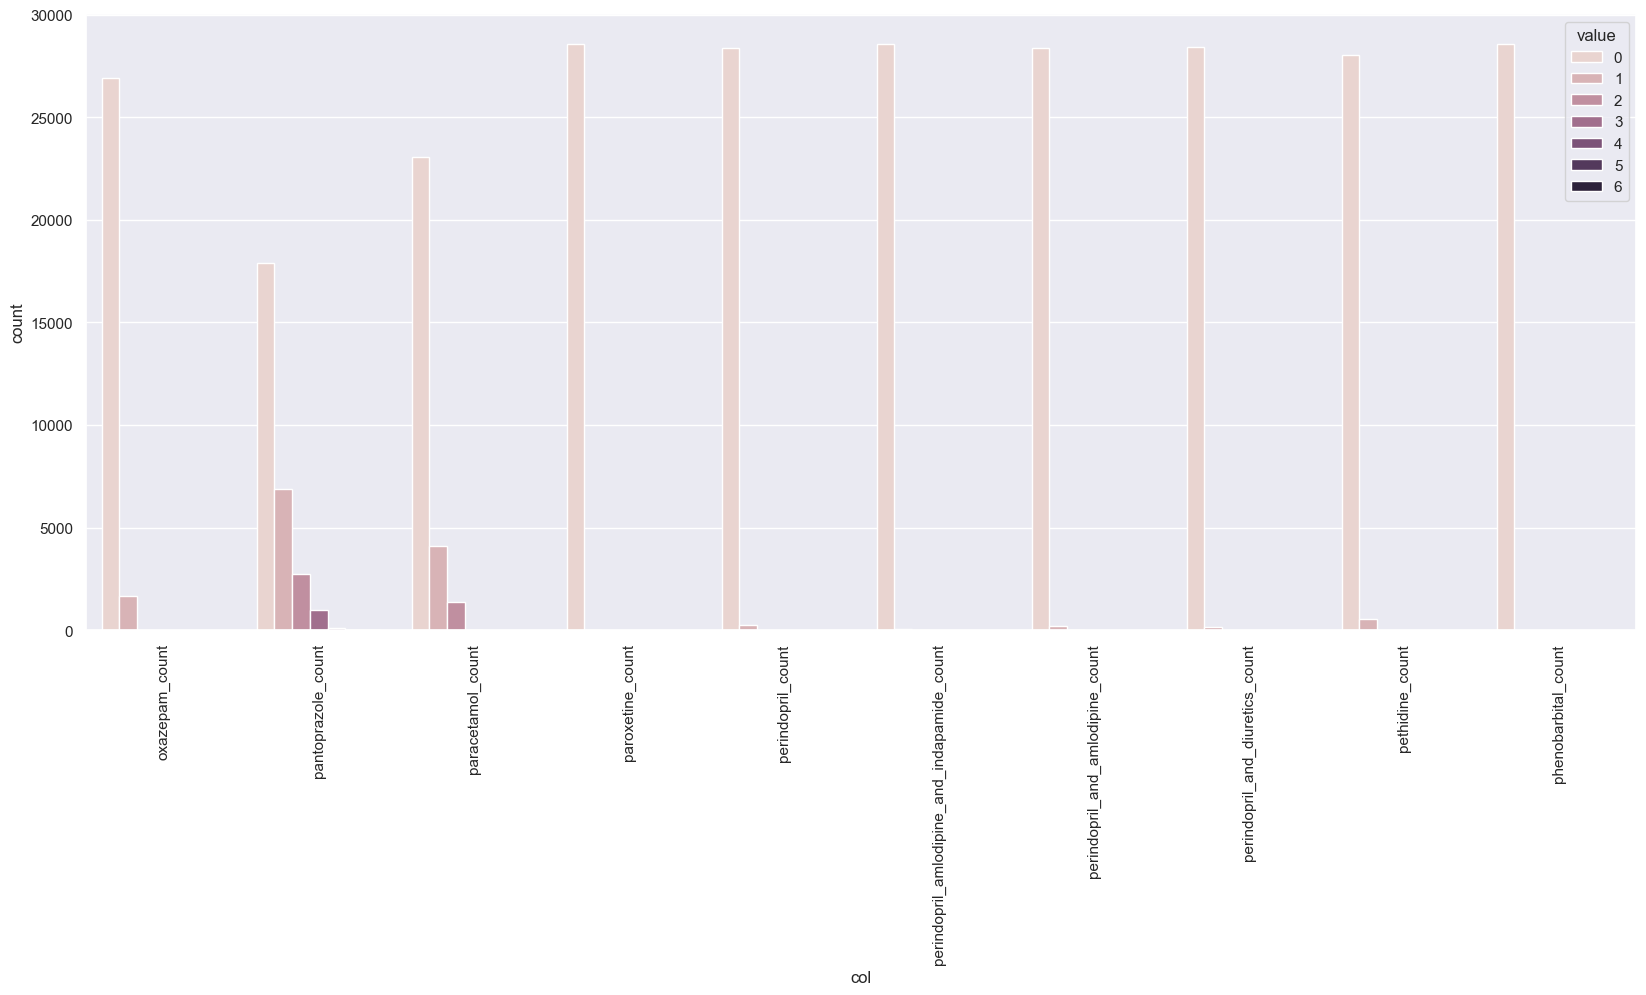

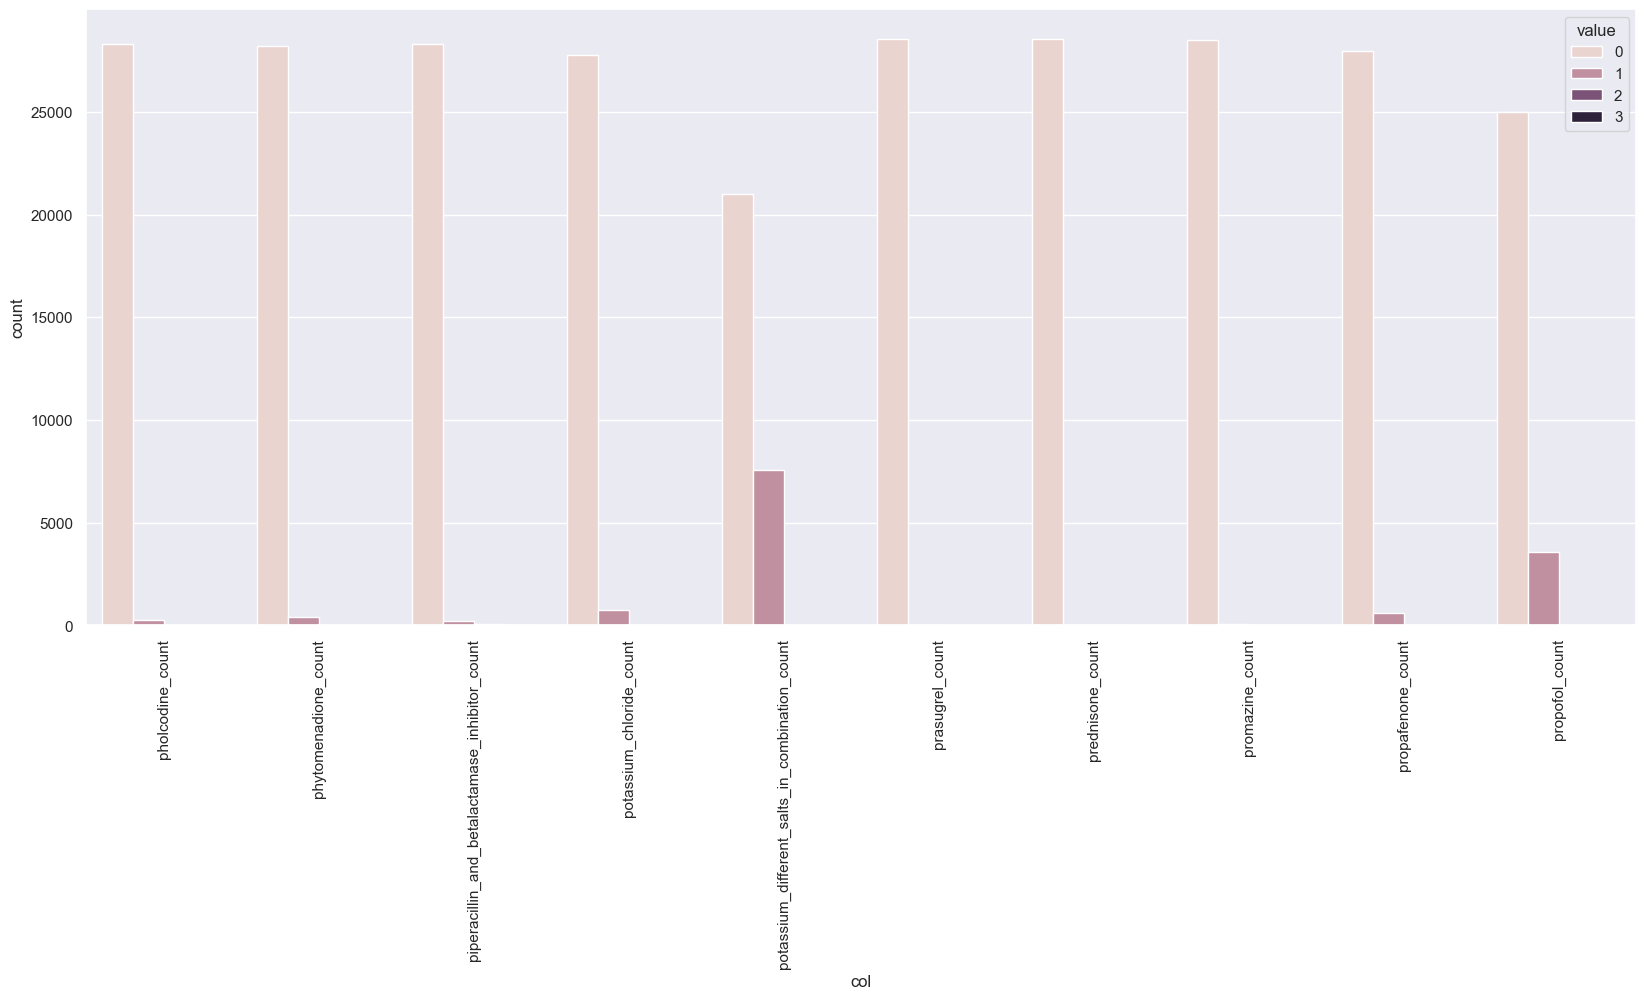

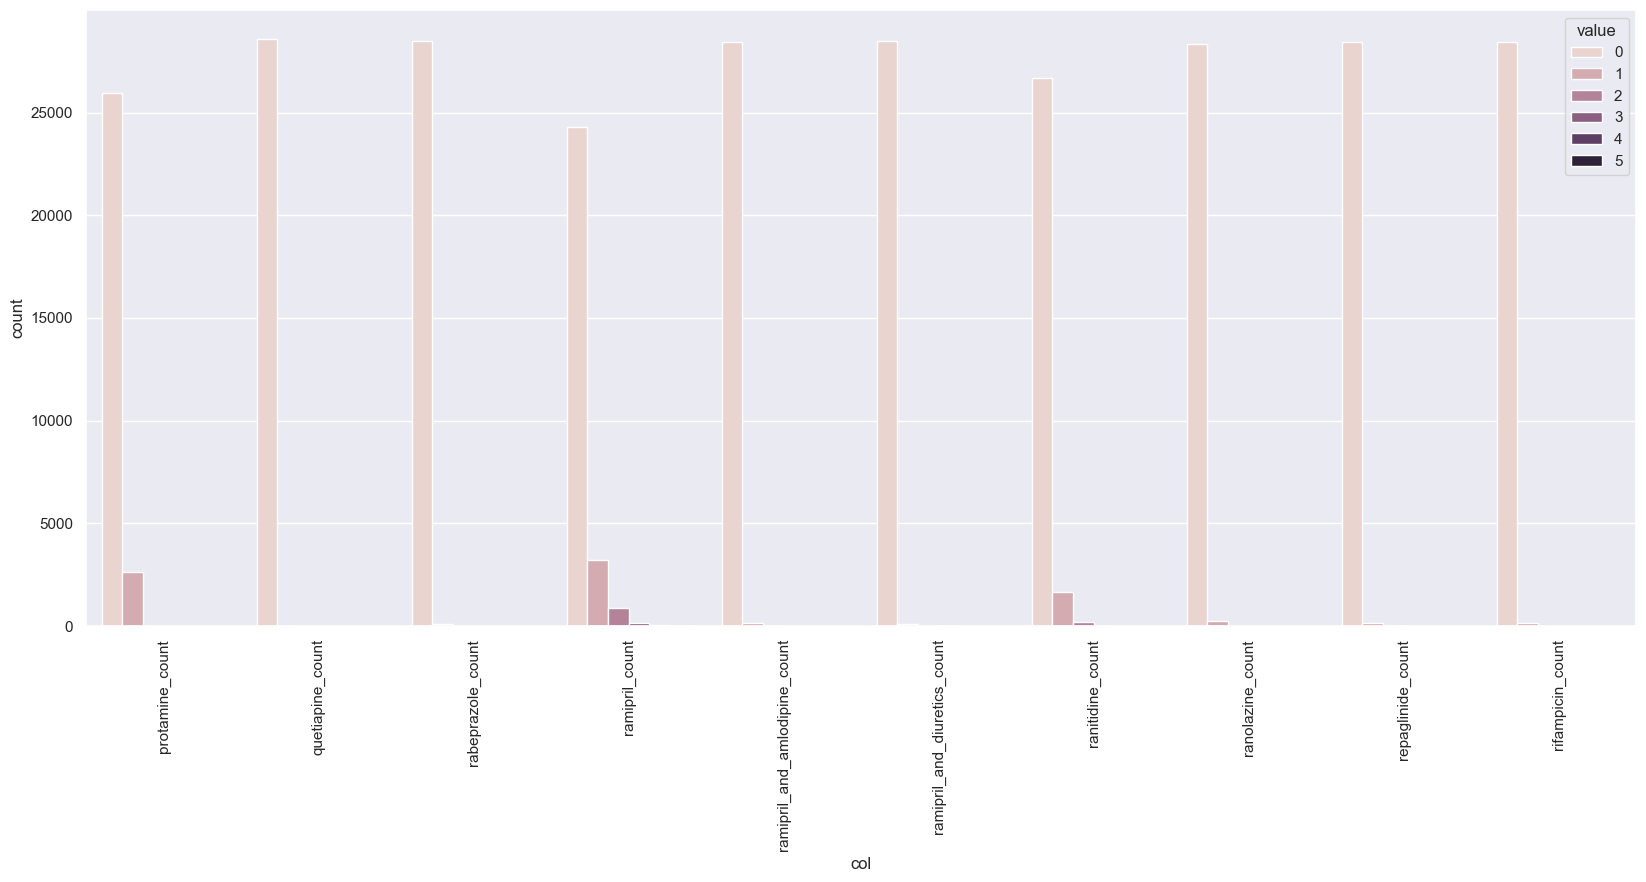

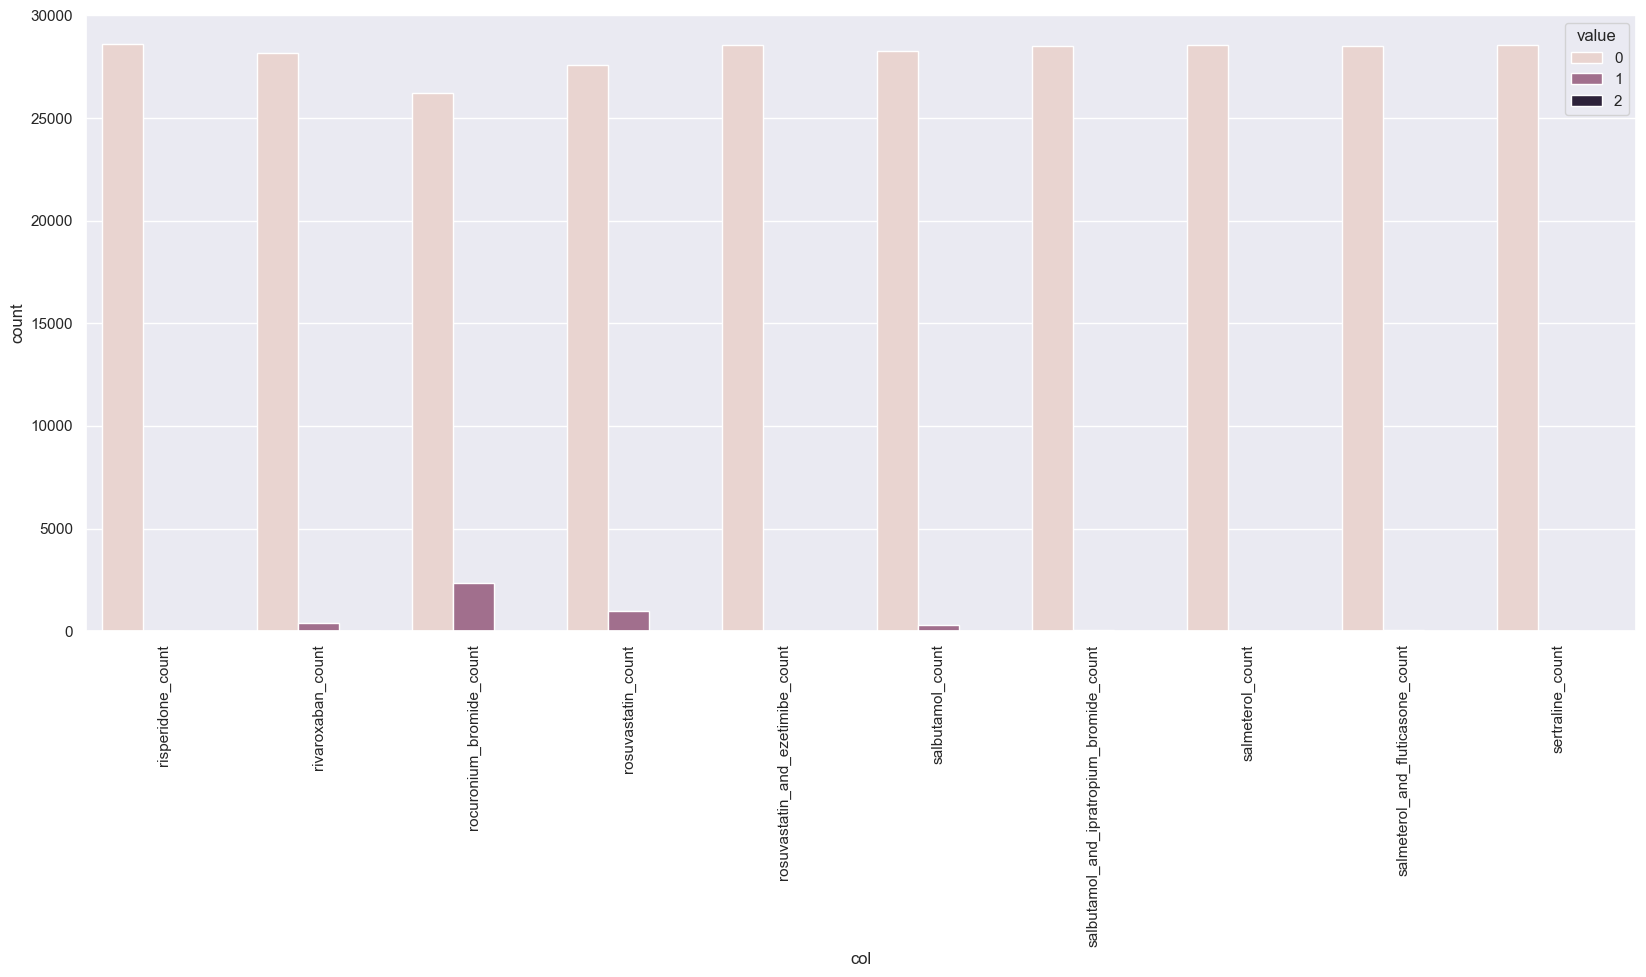

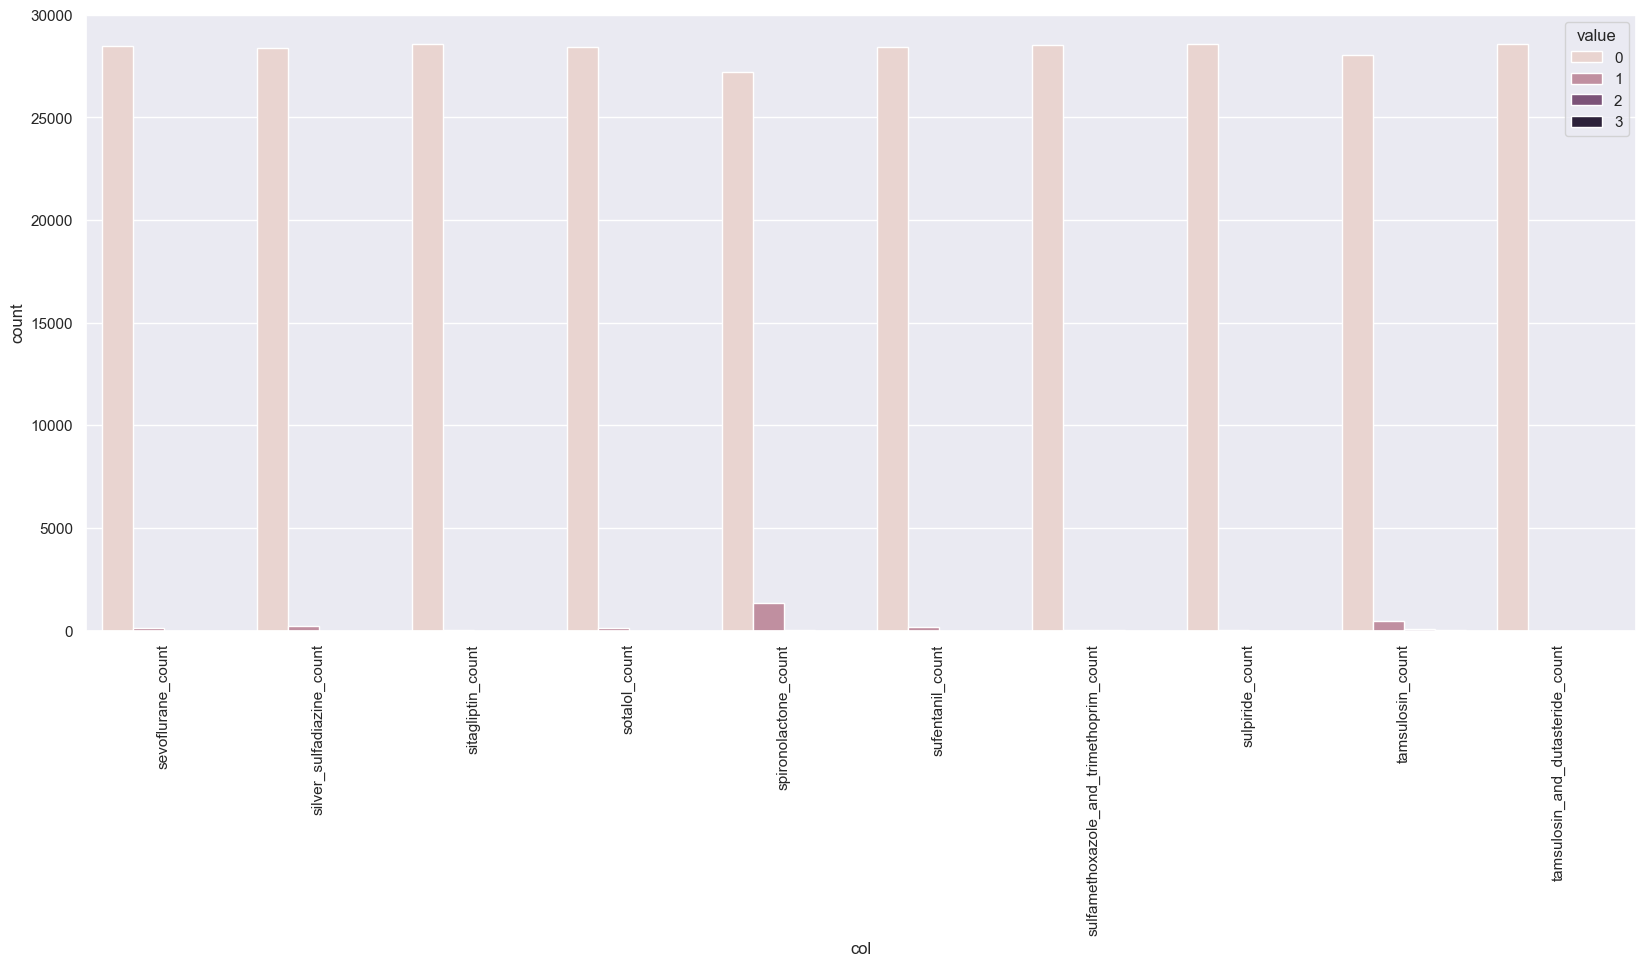

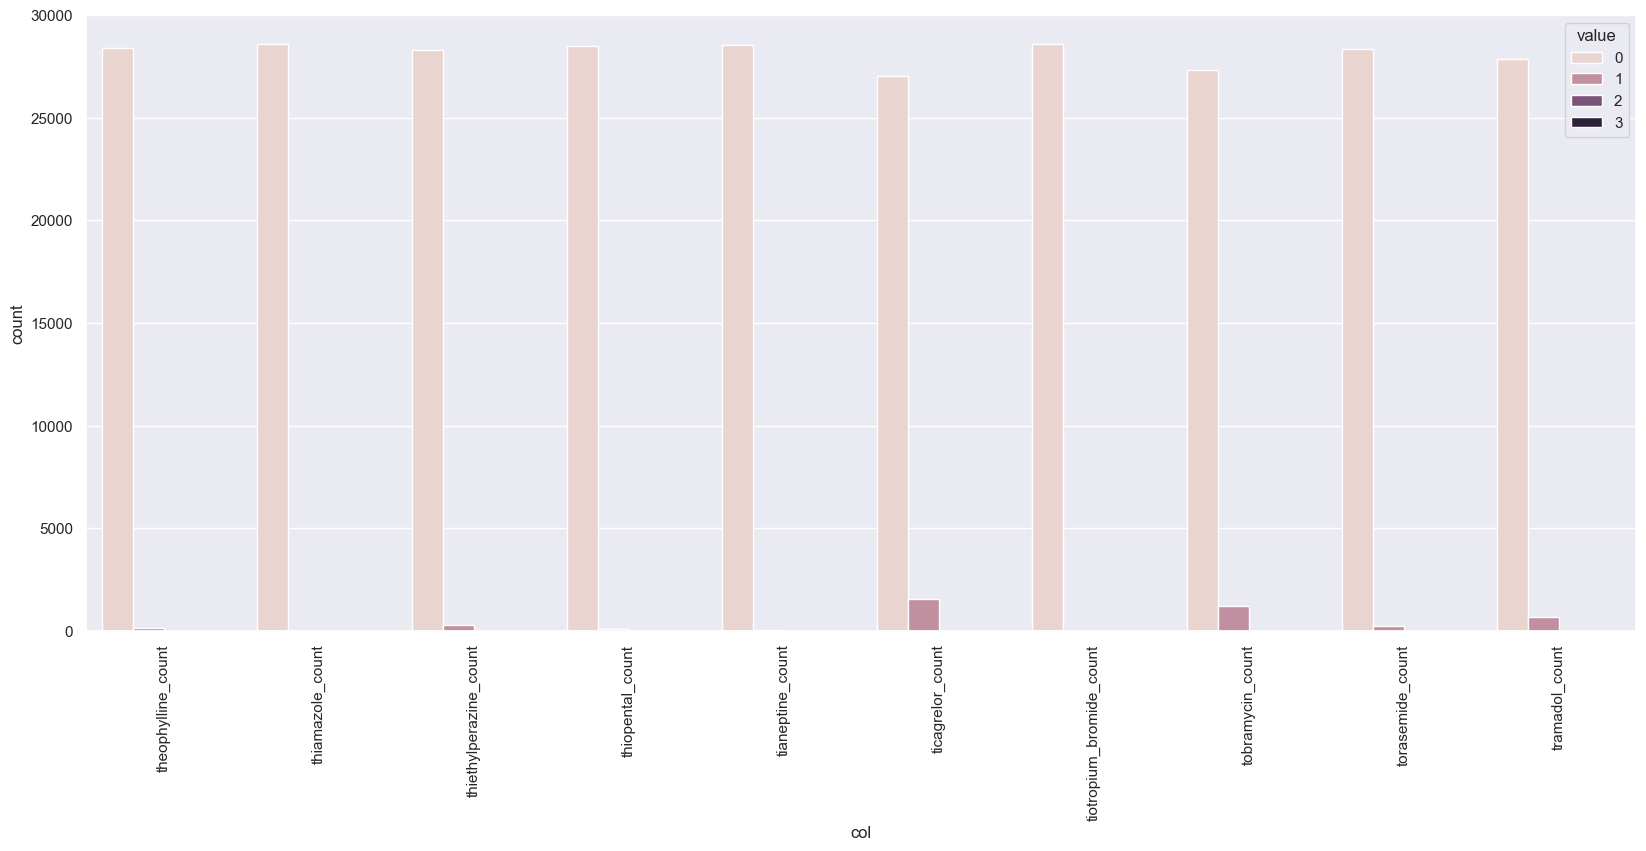

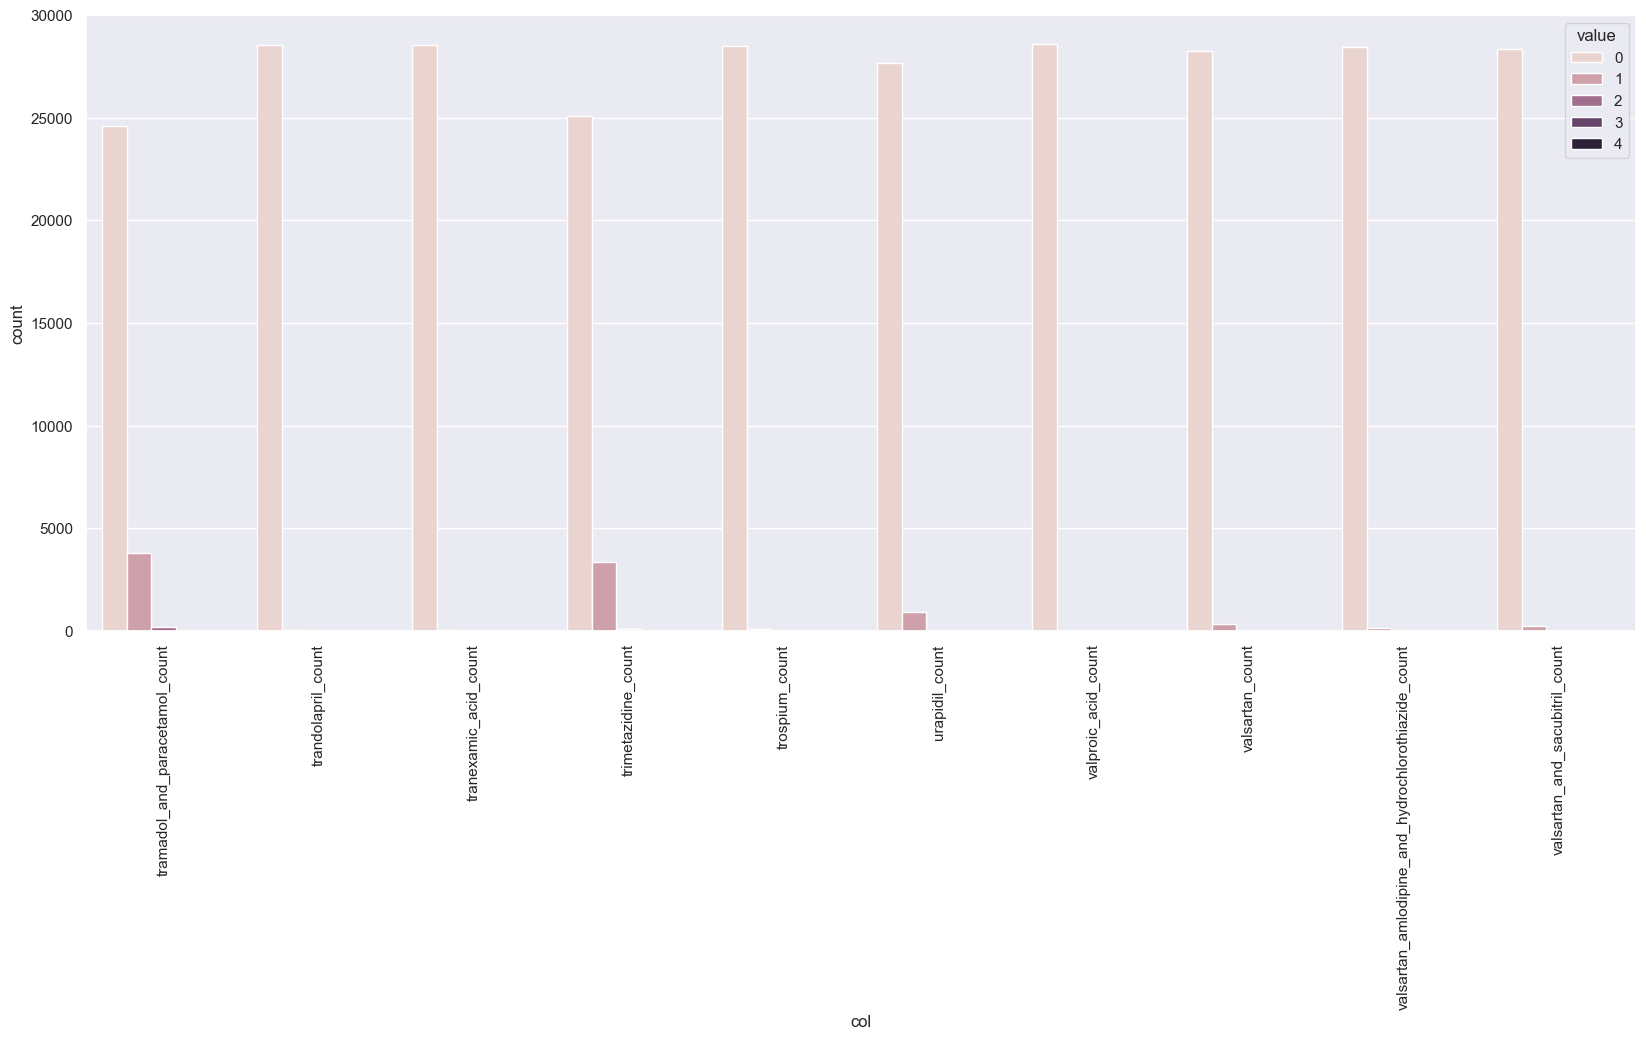

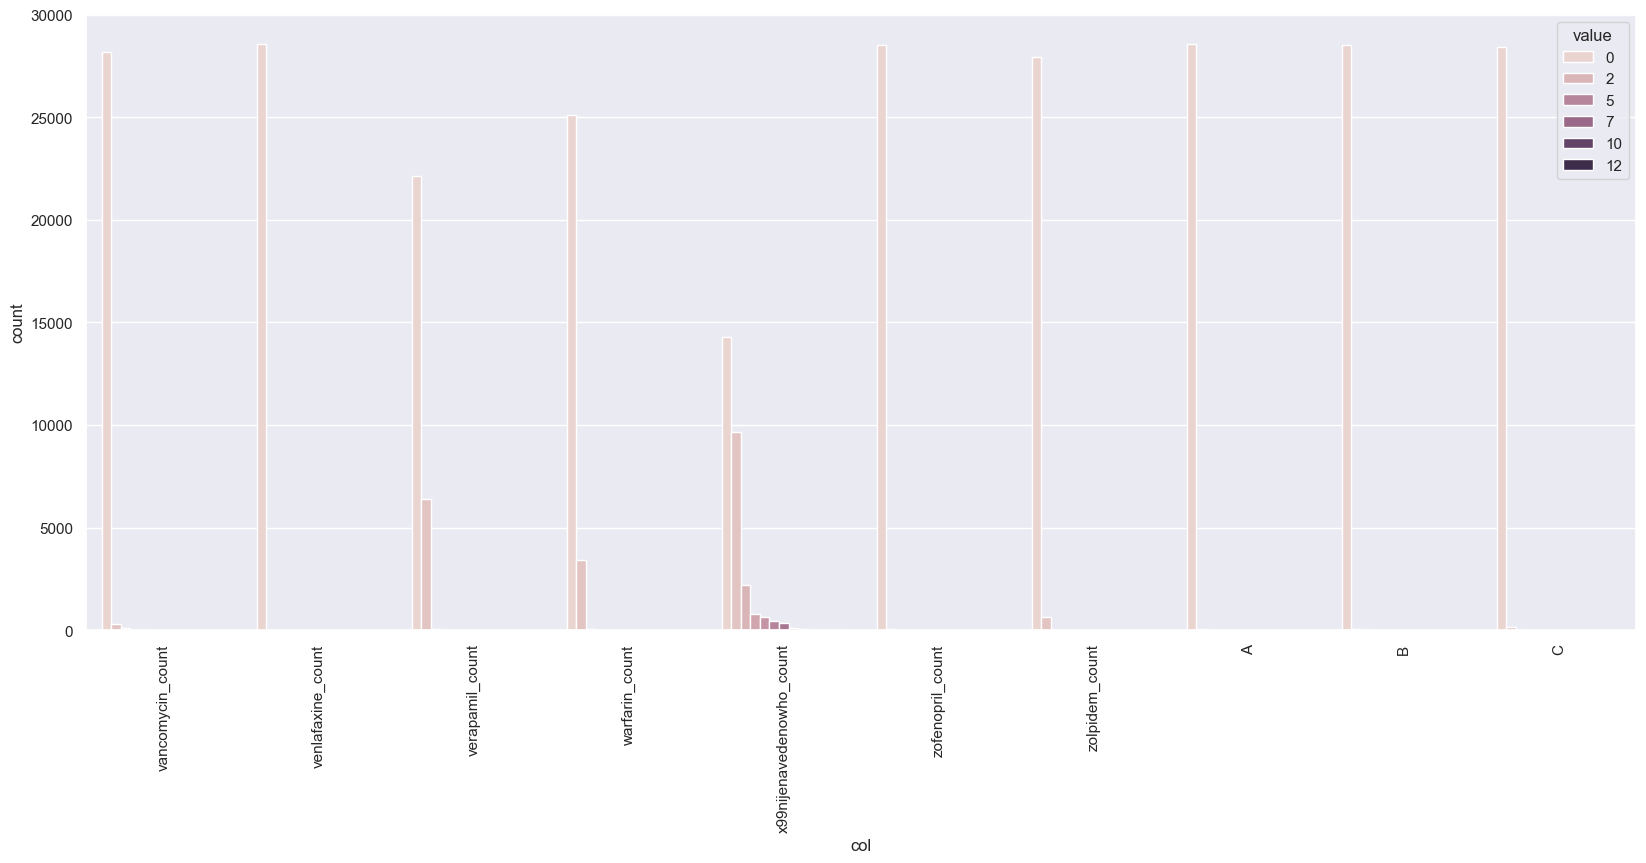

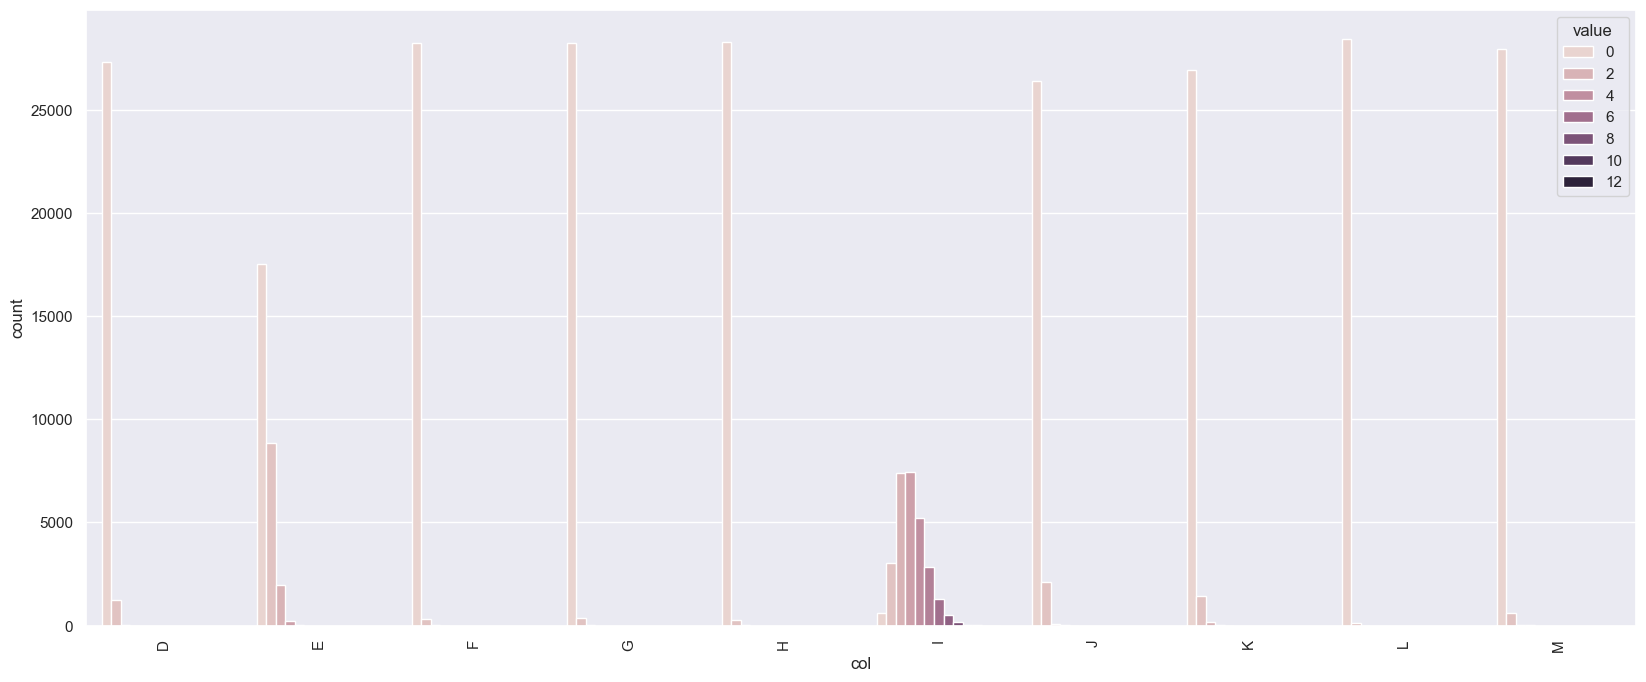

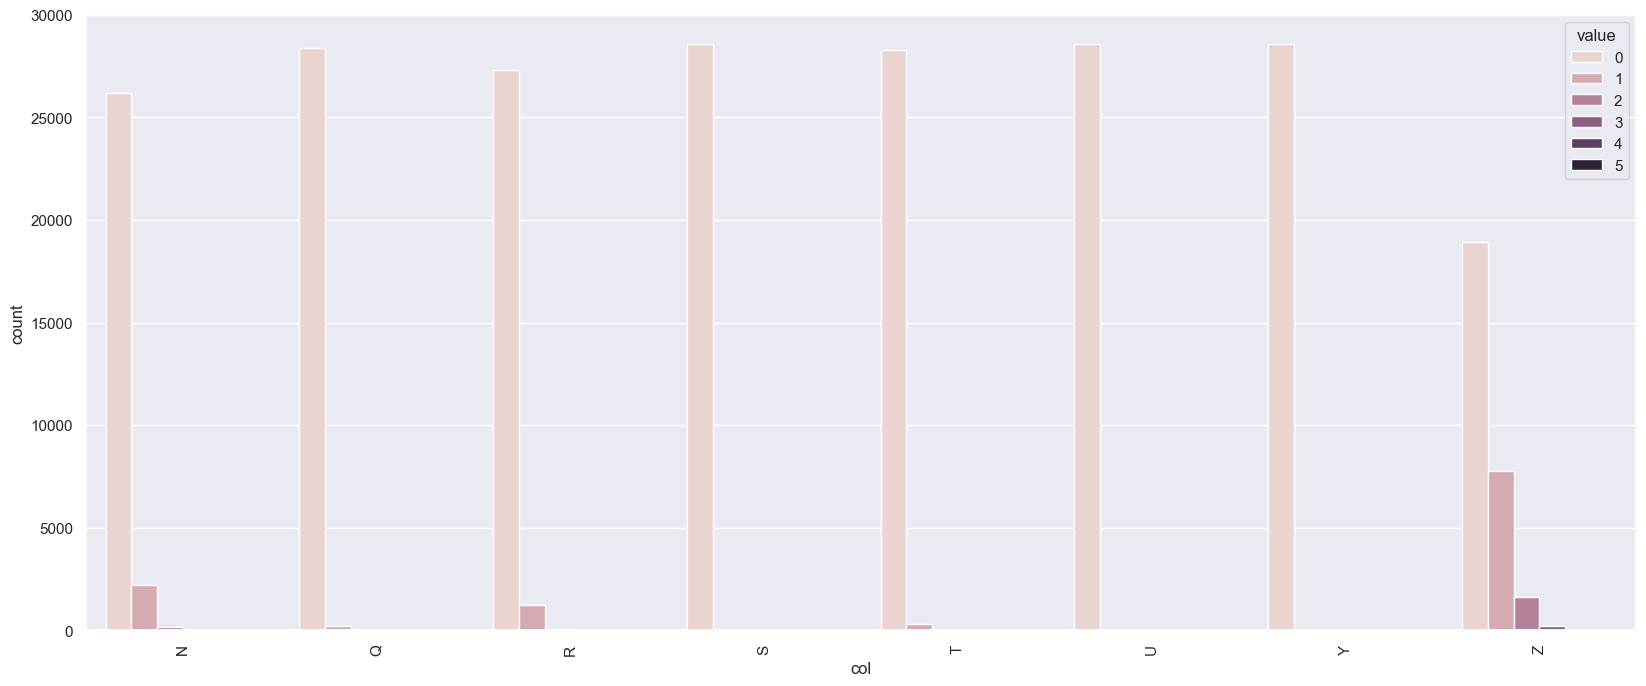

In [16]:
sns.set(rc={'figure.figsize':(20,8)})
for chunk in range(26):
    melted = df[sparse_cols[chunk*10:(chunk+1)*10]].apply(lambda x: x.value_counts()).T.stack().reset_index()
    melted.rename(columns={'level_0': 'col', 'level_1': 'value', 0: 'count'}, inplace=True)
    sns.barplot(data=melted, x='col', y='count', hue='value')
    plt.xticks(rotation=90)
    plt.show()


Vidimo da u train setu, velika većina kolona za ljekova / dijagnoze poprima vrijednost 0 u gotovo 100% slučaja. Takve kolone će biti do neke mjere problematične...

Monotone i skoro monotone značajke trebati će biti uklonjene

## Pregled "Bitnih" (prvih nekoliko) varijabla

In [63]:
def proportion_and_support_info(var):
    norm_freqs = df.groupby(var, dropna=False)['Label'].value_counts(normalize=True, dropna=False).reset_index()
    freqs = df.groupby(var, dropna=False)['Label'].value_counts(normalize=False, dropna=False).reset_index()
    return norm_freqs.merge(freqs, on=[var, 'Label'])

In [18]:
list(df.columns)[:15]

['AdmissionDx',
 'AdmissionType',
 'PreviousAdmissionDays',
 'LOS',
 'Age_Group',
 'Gender',
 'Surgery_Count',
 'LOS_ICU',
 'Discharge_Specialty',
 'Dx_Discharge',
 'Discharge_Status',
 'Weight_Discharge',
 'Height_Discharge',
 'Education',
 'Current_Work_Status']

### AdmissionDx

<Axes: xlabel='AdmissionDx', ylabel='count'>

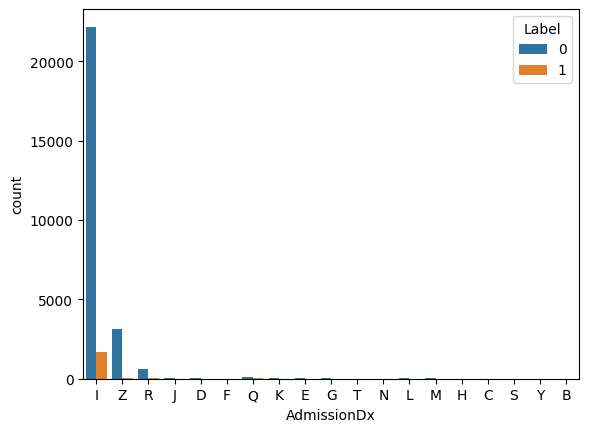

In [15]:
sns.countplot(df, x="AdmissionDx", hue="Label")

In [54]:
proportion_and_support_info('AdmissionDx')

,AdmissionDx,Label,proportion,count
0,B,0,1.000000,1
1,C,0,1.000000,6
2,D,0,0.900000,27
3,D,1,0.100000,3
4,E,0,0.904762,57
5,E,1,0.095238,6
6,F,0,0.857143,6
7,F,1,0.142857,1
8,G,0,1.000000,30
9,H,0,1.000000,2


Na prvi pogled jedino vrijednosti Z i Q se cini kao da ima značajnu prediktivnu moć. (Ostale vrijednosti ili imaju premali support odnosno premal broj primjera, ili imaju jednaku proporciju rehospitalizacija kao i cijela populacija training seta)

### AdmissionType

<Axes: xlabel='AdmissionType', ylabel='count'>

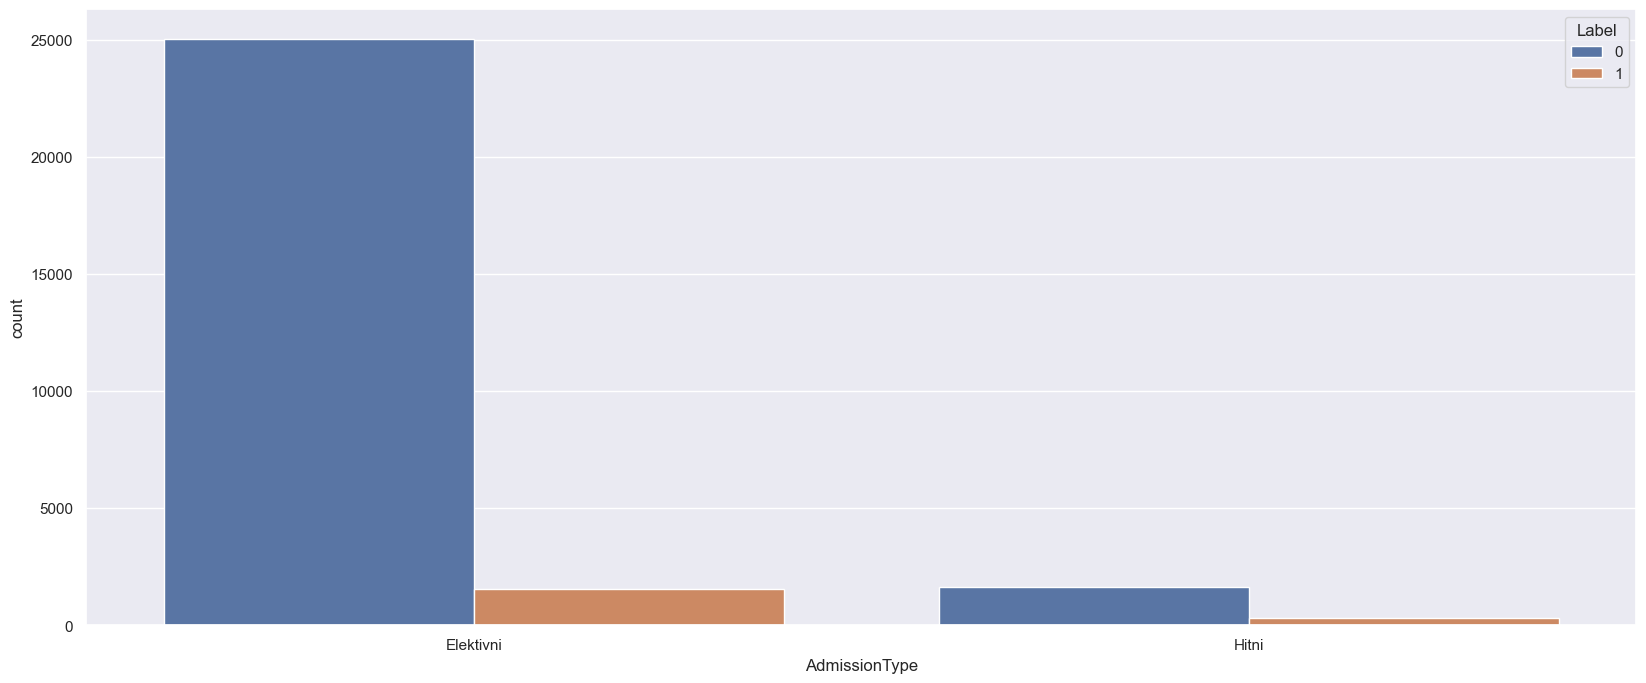

In [21]:
sns.countplot(df, x="AdmissionType", hue="Label")

In [55]:
proportion_and_support_info('AdmissionType')

,AdmissionType,Label,proportion,count
0,Elektivni,0,0.941439,25063
1,Elektivni,1,0.058561,1559
2,Hitni,0,0.831552,1634
3,Hitni,1,0.168448,331


Očito hitni slučajevi imaju veću incidenciju rehospitalizacije

### Age_Group

In [17]:
age_groups_sorted = sorted(list(df.Age_Group.unique()))

<Axes: xlabel='Age_Group', ylabel='count'>

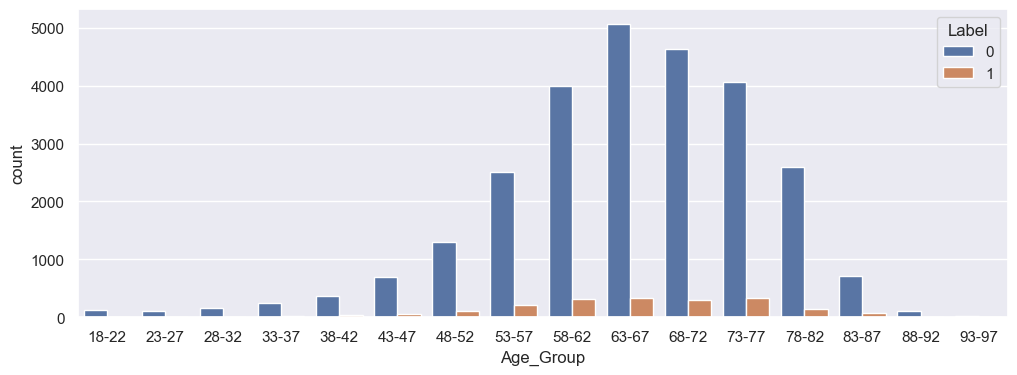

In [18]:
sns.set(rc={'figure.figsize':(12,4)})
sns.countplot(df, x="Age_Group", hue="Label", order=age_groups_sorted)

Text(0.5, 1.0, 'Age_Group za PreviousAdmissionDays == -8 retke')

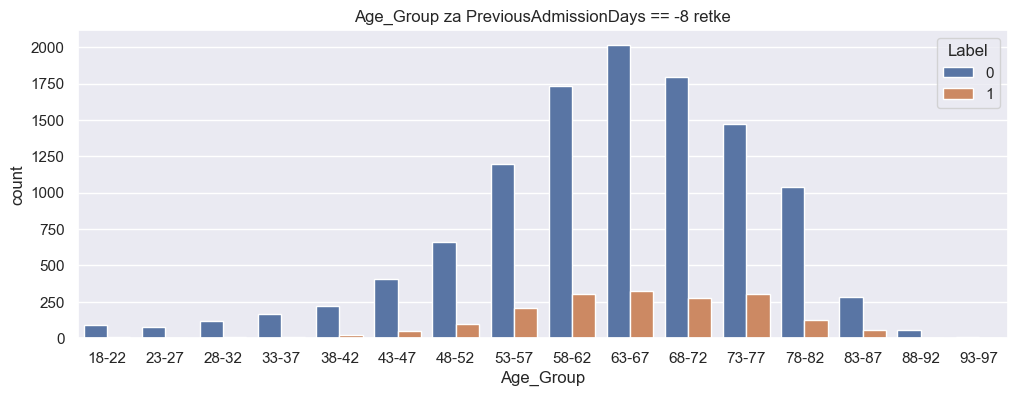

In [106]:
sns.set(rc={'figure.figsize':(12,4)})
sns.countplot(df[df.PreviousAdmissionDays == -8], x="Age_Group", hue="Label", order=age_groups_sorted)
plt.title('Age_Group za PreviousAdmissionDays == -8 retke')

Text(0.5, 1.0, 'Age_Group za PreviousAdmissionDays > 0 retke')

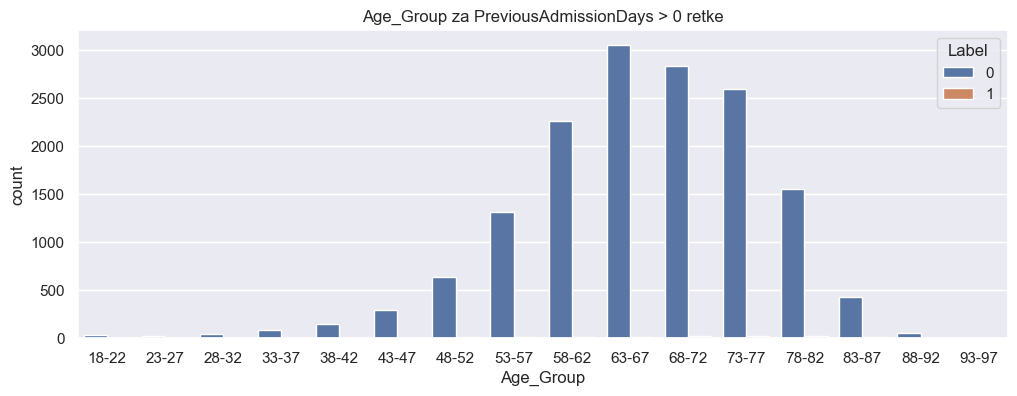

In [107]:
sns.set(rc={'figure.figsize':(12,4)})
sns.countplot(df[df.PreviousAdmissionDays > 0], x="Age_Group", hue="Label", order=age_groups_sorted)
plt.title('Age_Group za PreviousAdmissionDays > 0 retke')

In [64]:
proportion_and_support_info('Age_Group')

,Age_Group,Label,proportion,count
0,18-22,0,0.944444,119
1,18-22,1,0.055556,7
2,23-27,0,0.971429,102
3,23-27,1,0.028571,3
4,28-32,0,0.969136,157
5,28-32,1,0.030864,5
6,33-37,0,0.961538,250
7,33-37,1,0.038462,10
8,38-42,0,0.931990,370
9,38-42,1,0.068010,27


Većina age grupa ima jako slične incidencije rehospitalizacije kao i generalna populacija.

### Gender

<Axes: xlabel='Gender', ylabel='count'>

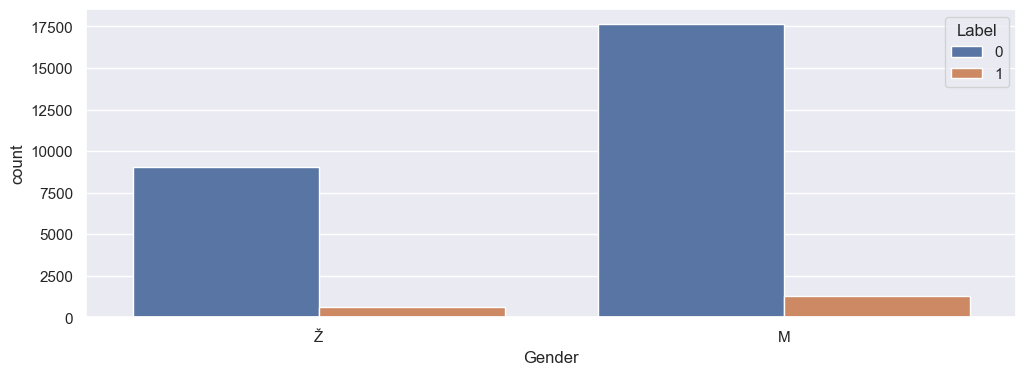

In [26]:
sns.set(rc={'figure.figsize':(12,4)})
sns.countplot(df, x="Gender", hue="Label")

In [57]:
proportion_and_support_info('Gender')

,Gender,Label,proportion,count
0,M,0,0.932692,17654
1,M,1,0.067308,1274
2,Ž,0,0.936212,9041
3,Ž,1,0.063788,616
4,NaN,0,1.000000,2


Spol, sam po sebi, nema utjecaja na rehospitalizaciju.

### Discharge_Specialty

<Axes: xlabel='Discharge_Specialty', ylabel='count'>

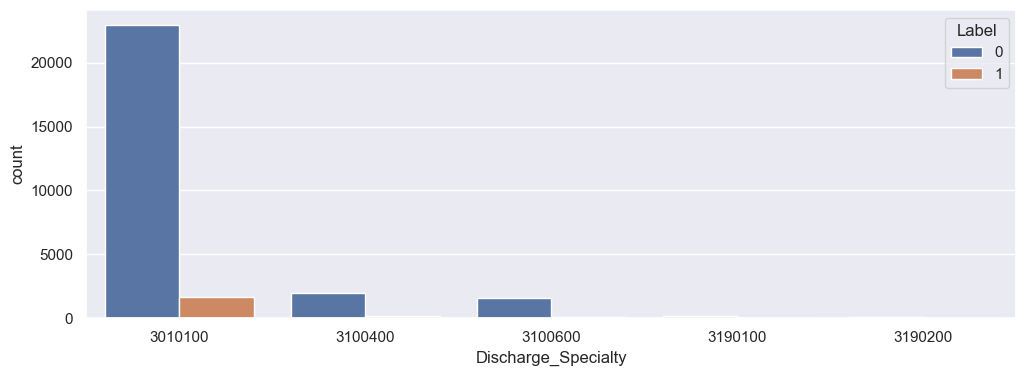

In [28]:
sns.set(rc={'figure.figsize':(12,4)})
sns.countplot(df, x="Discharge_Specialty", hue="Label")

In [58]:
proportion_and_support_info('Discharge_Specialty')

,Discharge_Specialty,Label,proportion,count
0,3010100,0,0.932317,23004
1,3010100,1,0.067683,1670
2,3100400,0,0.929952,1925
3,3100400,1,0.070048,145
4,3100600,0,0.969117,1569
5,3100600,1,0.030883,50
6,3190100,0,0.905660,144
7,3190100,1,0.094340,15
8,3190200,0,0.846154,55
9,3190200,1,0.153846,10


The last two codes 3190100 and 3190200 indicate higher incidence of rehospitalization, while 3100600 indicates lower rates compared to the overall population.

### Dx_Discharge

<Axes: xlabel='Dx_Discharge', ylabel='count'>

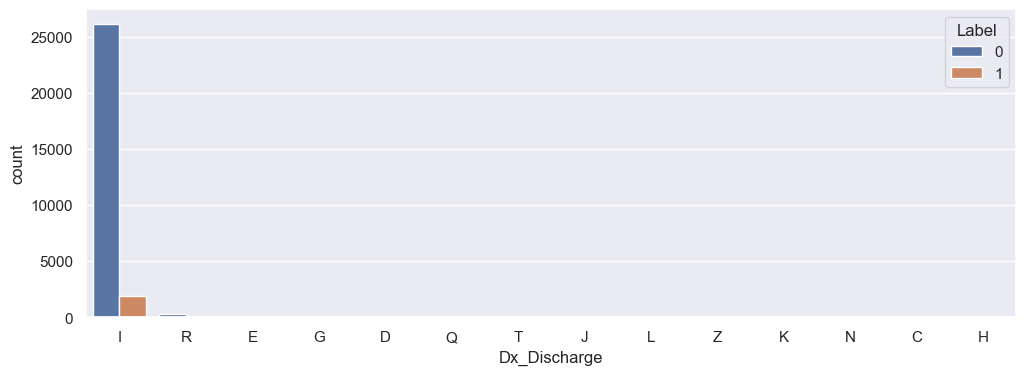

In [30]:
sns.set(rc={'figure.figsize':(12,4)})
sns.countplot(df, x="Dx_Discharge", hue="Label")

In [59]:
proportion_and_support_info('Dx_Discharge')

,Dx_Discharge,Label,proportion,count
0,C,0,1.000000,2
1,D,0,0.857143,42
2,D,1,0.142857,7
3,E,0,1.000000,22
4,G,0,0.846154,11
5,G,1,0.153846,2
6,H,0,1.000000,2
7,I,0,0.933826,26163
8,I,1,0.066174,1854
9,J,0,0.978723,46


A few seem useful

### Discharge_Status

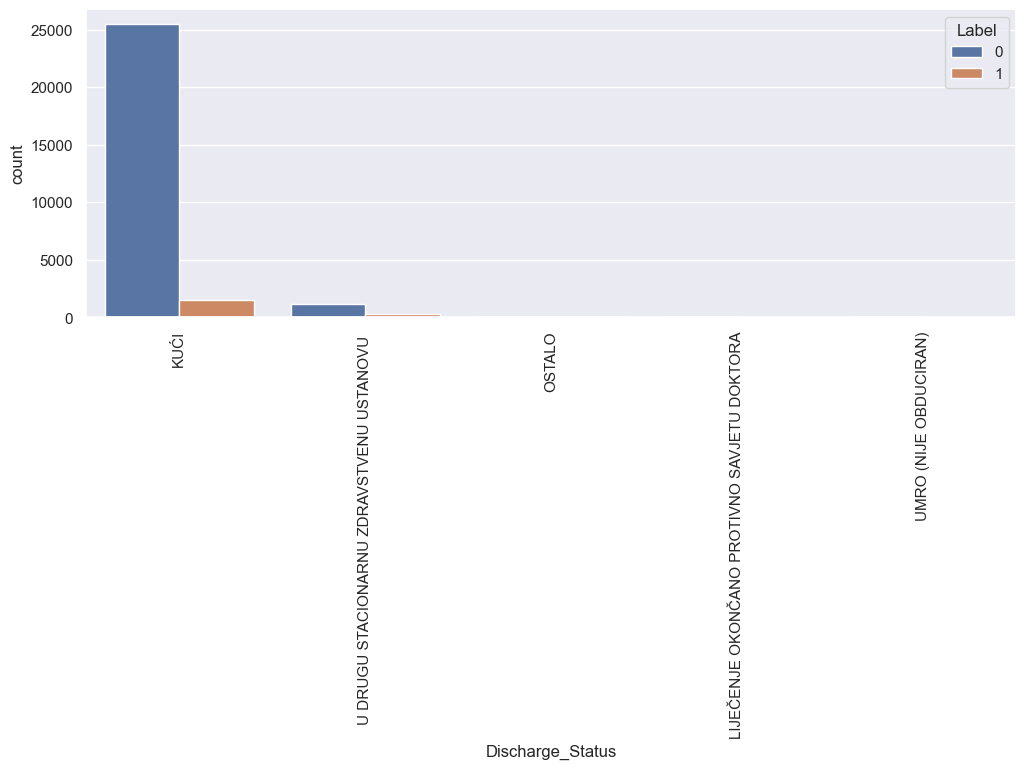

In [34]:
sns.set(rc={'figure.figsize':(12,4)})
sns.countplot(df, x="Discharge_Status", hue="Label")
plt.xticks(rotation=90)
plt.show()

In [60]:
proportion_and_support_info('Discharge_Status')

,Discharge_Status,Label,proportion,count
0,KUĆI,0,0.942501,25489
1,KUĆI,1,0.057499,1555
2,LIJEČENJE OKONČANO PROTIVNO SAVJETU DOKTORA,0,1.000000,1
3,OSTALO,0,0.875000,7
4,OSTALO,1,0.125000,1
5,U DRUGU STACIONARNU ZDRAVSTVENU USTANOVU,0,0.782127,1199
6,U DRUGU STACIONARNU ZDRAVSTVENU USTANOVU,1,0.217873,334
7,UMRO (NIJE OBDUCIRAN),0,1.000000,1


'KUĆI' i 'U DRUGU STACIONARNU ZDRAVSTVENU USTANOVU' su korisni.

### Education

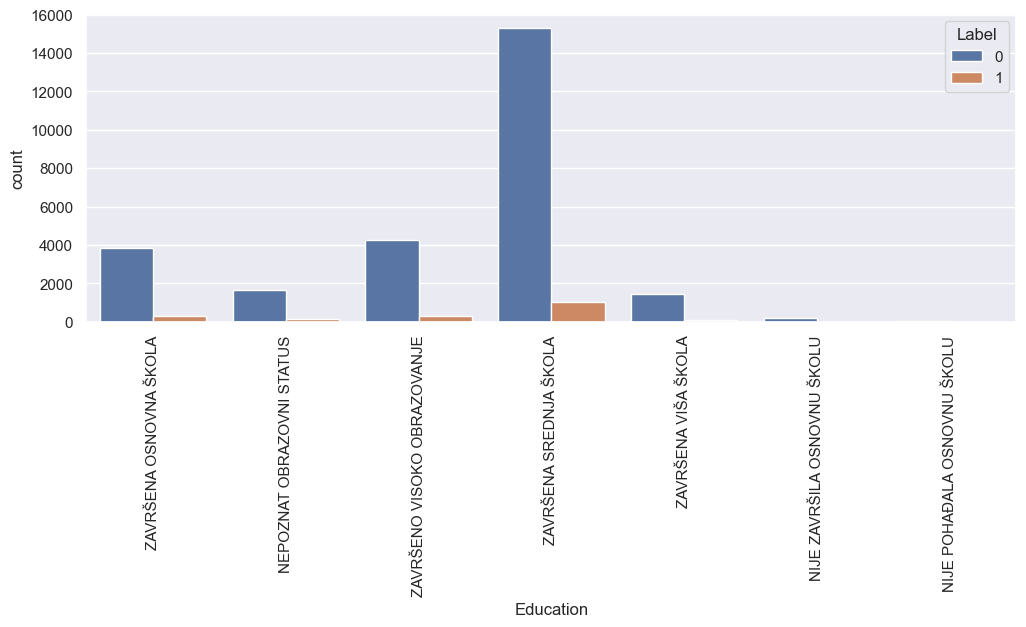

In [37]:
sns.set(rc={'figure.figsize':(12,4)})
sns.countplot(df, x="Education", hue="Label")
plt.xticks(rotation=90)
plt.show()

In [61]:
proportion_and_support_info('Education')

,Education,Label,proportion,count
0,NEPOZNAT OBRAZOVNI STATUS,0,0.923556,1631
1,NEPOZNAT OBRAZOVNI STATUS,1,0.076444,135
2,NIJE POHAĐALA OSNOVNU ŠKOLU,0,1.000000,15
3,NIJE ZAVRŠILA OSNOVNU ŠKOLU,0,0.974619,192
4,NIJE ZAVRŠILA OSNOVNU ŠKOLU,1,0.025381,5
5,ZAVRŠENA OSNOVNA ŠKOLA,0,0.923965,3840
6,ZAVRŠENA OSNOVNA ŠKOLA,1,0.076035,316
7,ZAVRŠENA SREDNJA ŠKOLA,0,0.936715,15290
8,ZAVRŠENA SREDNJA ŠKOLA,1,0.063285,1033
9,ZAVRŠENA VIŠA ŠKOLA,0,0.929397,1448


In [24]:
df[df.Education.isna()].Label.value_counts()

Label
0    37
1     1
Name: count, dtype: int64

Ovaj feature se ne čini obećavajuć.

### Current_Work_Status

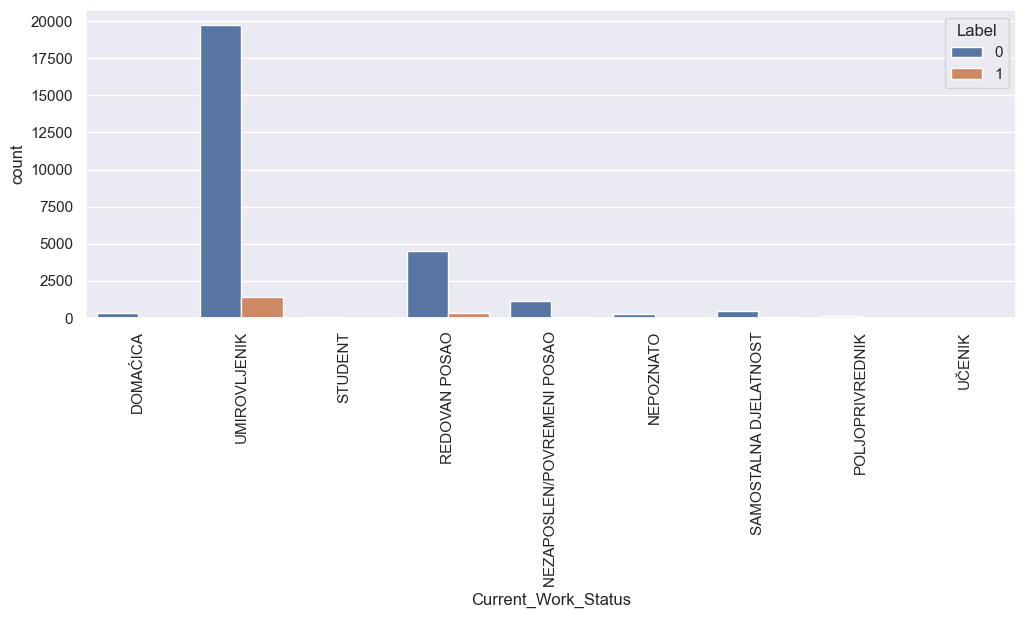

In [40]:
sns.set(rc={'figure.figsize':(12,4)})
sns.countplot(df, x="Current_Work_Status", hue="Label")
plt.xticks(rotation=90)
plt.show()

In [62]:
proportion_and_support_info('Current_Work_Status')

,Current_Work_Status,Label,proportion,count
0,DOMAĆICA,0,0.987500,316
1,DOMAĆICA,1,0.012500,4
2,NEPOZNATO,0,0.922330,285
3,NEPOZNATO,1,0.077670,24
4,NEZAPOSLEN/POVREMENI POSAO,0,0.924800,1156
5,NEZAPOSLEN/POVREMENI POSAO,1,0.075200,94
6,POLJOPRIVREDNIK,0,0.873950,104
7,POLJOPRIVREDNIK,1,0.126050,15
8,REDOVAN POSAO,0,0.936392,4490
9,REDOVAN POSAO,1,0.063608,305


A couple seem useful

### Numeričke vrijednosti

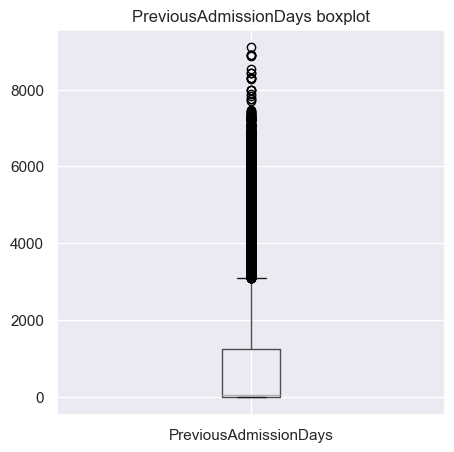

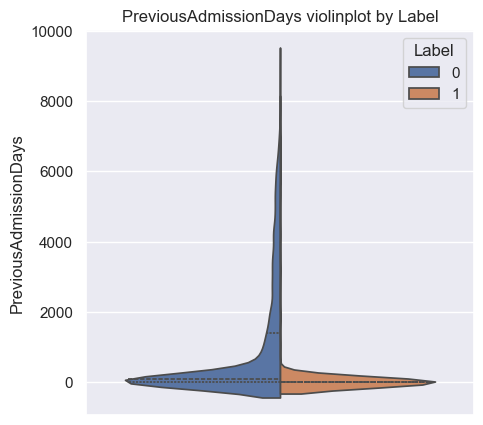

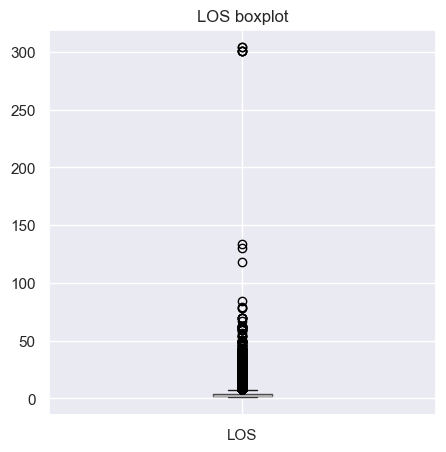

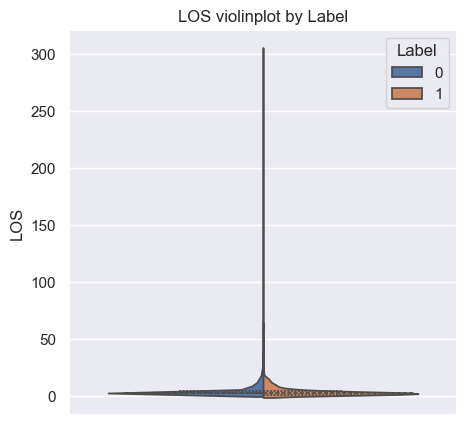

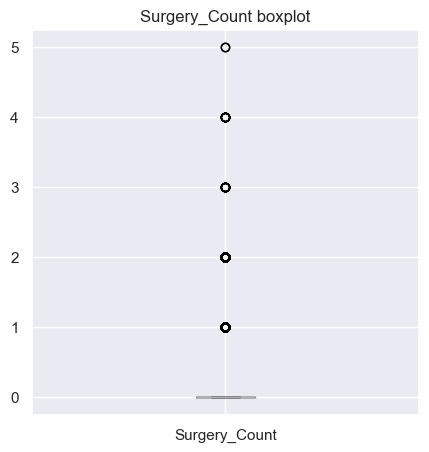

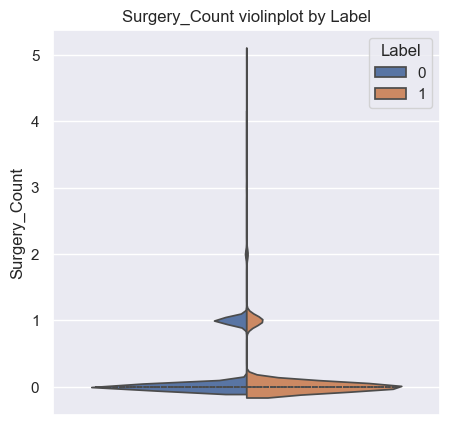

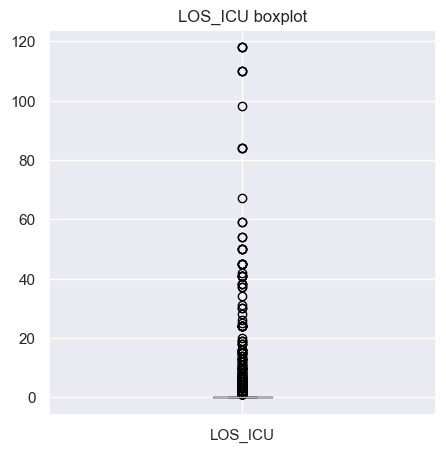

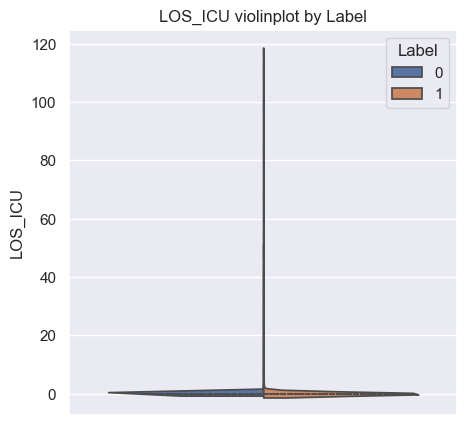

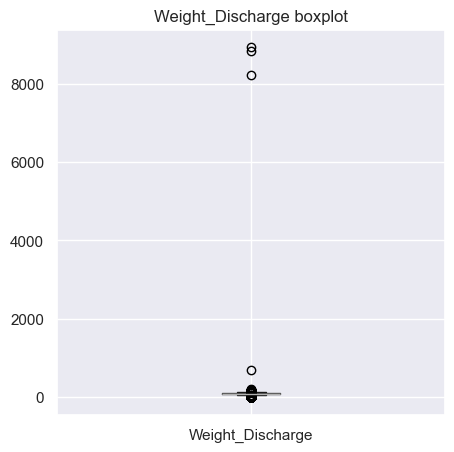

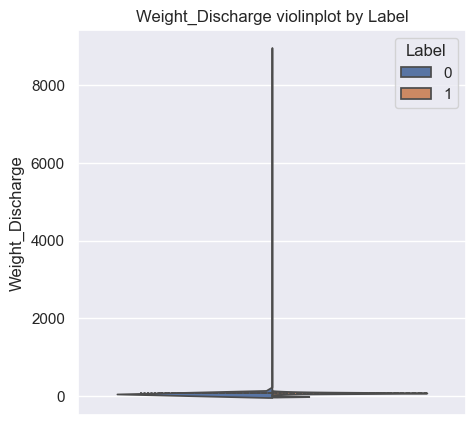

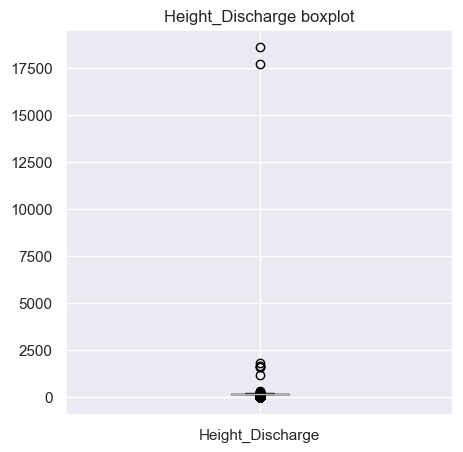

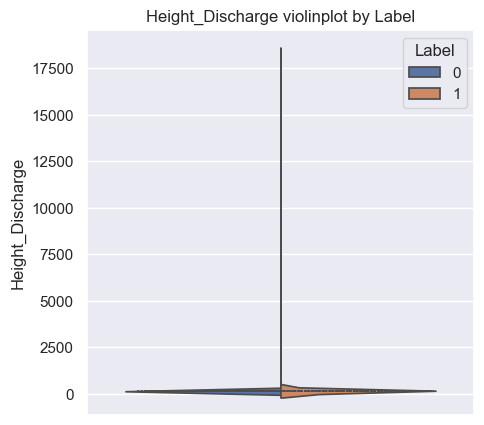

In [60]:
numerical_cols=[
    'PreviousAdmissionDays',
    'LOS',
    'Surgery_Count',
    'LOS_ICU',
    'Weight_Discharge',
    'Height_Discharge'
]
sns.set(rc={'figure.figsize':(5,5)})
for c in numerical_cols:
    df[[c]].boxplot()
    plt.title(f'{c} boxplot')
    plt.show()
    sns.violinplot(data=df, y=c, hue="Label", split=True, inner="quart")
    plt.title(f'{c} violinplot by Label')
    plt.show()

In [58]:
df[numerical_cols].describe()

,PreviousAdmissionDays,LOS,Surgery_Count,LOS_ICU,Weight_Discharge,Height_Discharge
count,28587.000000,28587.000000,28587.000000,28587.000000,28587.000000,28587.000000
mean,963.970756,4.052331,0.182845,0.131633,81.555812,163.704691
std,1652.258835,6.672632,0.415760,2.561615,91.870577,157.030981
min,-8.000000,1.000000,0.000000,0.000000,-8.000000,-8.000000
25%,-8.000000,2.000000,0.000000,0.000000,72.000000,163.000000
50%,42.000000,2.000000,0.000000,0.000000,84.000000,171.000000
75%,1236.000000,4.000000,0.000000,0.000000,95.000000,178.000000
max,9098.000000,304.000000,5.000000,118.000000,8936.900000,18584.000000


In [78]:
df[df.PreviousAdmissionDays > 0].PreviousAdmissionDays.describe()

count    15464.000000
mean      1788.800828
std       1888.026845
min          1.000000
25%        208.000000
50%       1036.000000
75%       3023.250000
max       9098.000000
Name: PreviousAdmissionDays, dtype: float64

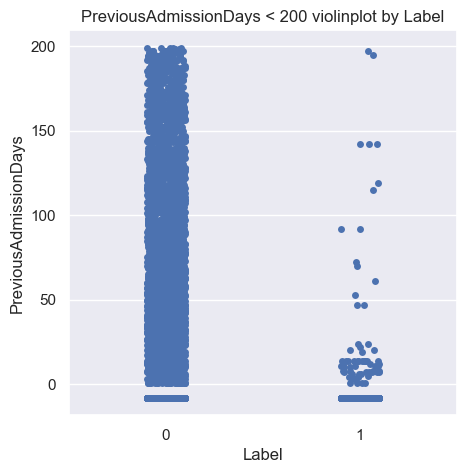

In [89]:
sns.stripplot(data=df[df.PreviousAdmissionDays < 200], y='PreviousAdmissionDays', x="Label")
plt.title(f'PreviousAdmissionDays < 200 violinplot by Label')
plt.show()

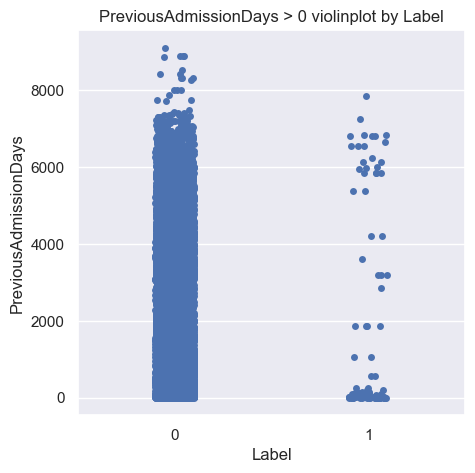

In [83]:
sns.stripplot(data=df[df.PreviousAdmissionDays > 0], y='PreviousAdmissionDays', x="Label")
plt.title(f'PreviousAdmissionDays > 0 violinplot by Label')
plt.show()

In [85]:
df[df.PreviousAdmissionDays < 0].Label.value_counts(normalize=True)

Label
0    0.864055
1    0.135945
Name: proportion, dtype: float64

In [86]:
df[df.PreviousAdmissionDays > 0].Label.value_counts(normalize=True)

Label
0    0.993145
1    0.006855
Name: proportion, dtype: float64

In [91]:
df.Label.value_counts()

Label
0    26697
1     1890
Name: count, dtype: int64

In [92]:
df[df.PreviousAdmissionDays == -8].Label.value_counts()

Label
0    11339
1     1784
Name: count, dtype: int64

Skoro svi (1784/1890 = 94%) rehospitalizirani pacjenti imaju PreviousAdmissionDays == -8 iz nekog razloga

In [21]:
df[df.PreviousAdmissionDays > 0][['PreviousAdmissionDays', 'Label']].corr()

,PreviousAdmissionDays,Label
PreviousAdmissionDays,1.000000,-0.002479
Label,-0.002479,1.000000


Label zapravo uopce nije koreliran s PreviousAdmissionDays.

In [95]:
(df_test.PreviousAdmissionDays == -8).value_counts(normalize=True)

PreviousAdmissionDays
False    0.583152
True     0.416848
Name: proportion, dtype: float64

Možemo dakle očekivati da su velika većina rehospitalizacija u testnom setu u podskupu s PreviousAdmissionDays == -8

Zanimljivo, oni s previous days -8 su vise vjerojatni da budu rehospitalizirani od prosjeka ()

In [81]:
df[df.PreviousAdmissionDays > 0].PreviousAdmissionDays.min()

1

In [66]:
9098/365

24.926027397260274

Najstarije zabiljezeno prijasnje lijecenje se dogodilo prije 25 godina, provjeriti je li to stvarno tocno ili se i tu nosimo s pogresnim vrijednostima.

Očito imamo krive vrijednosti... Npr. što znače negativne vrijednosti u PreviousAdmissionDays? jesu li to pogreške? Imamo jako puno takvih vrijednosti da bi to bila pogreška... 25% podataka ima PreviousAdmissionDays=-8

Također visina od 18584cm je sigurno kriva

In [19]:
df[df.PreviousAdmissionDays <= 0][['PreviousAdmissionDays']].value_counts()

PreviousAdmissionDays
-8                       13123
Name: count, dtype: int64

In [69]:
df[df.PreviousAdmissionDays > 7000].PreviousAdmissionDays

583      7094
957      8309
1042     7995
1122     7995
1941     8886
2027     7336
2850     8420
3773     8886
4106     8886
4566     7194
4588     8868
4734     7705
4888     7099
4981     7099
5004     7072
7545     7194
8184     7194
9065     7083
9209     7288
10239    7199
10421    7354
11234    7225
11672    7199
11953    7048
12500    7354
12610    7073
13010    7386
13663    7190
13767    7199
14884    7339
14899    8420
15006    9098
15356    8523
15612    7838
16162    7251
16370    7083
16396    7288
16400    7288
16614    7410
16822    7746
17063    8309
17279    7204
17620    7261
18076    7256
18188    7995
18693    7354
19032    7094
19641    7073
19724    7055
20786    7199
21183    7746
21199    7073
21270    7194
21315    7048
21465    7050
21563    7048
22066    7199
22507    7316
22834    7479
22953    7436
23012    7290
23406    7204
23604    8272
24052    7874
24153    7290
24742    8309
24910    7145
25042    7048
25775    7109
26028    7410
26096    7048
26682 

In [21]:
df[df.Weight_Discharge <= 0][['Weight_Discharge']].value_counts()

Weight_Discharge
-8.0                1441
Name: count, dtype: int64

In [23]:
df[df.Height_Discharge <= 0][['Height_Discharge']].value_counts()

Height_Discharge
-8.0                1445
Name: count, dtype: int64

In [56]:
df[df.Height_Discharge <= 0][['Height_Discharge', 'Weight_Discharge', 'PreviousAdmissionDays']].describe()

,Height_Discharge,Weight_Discharge,PreviousAdmissionDays
count,1445.0,1445.000000,1445.000000
mean,-8.0,-7.950173,757.143253
std,0.0,0.668034,1482.069761
min,-8.0,-8.000000,-8.000000
25%,-8.0,-8.000000,-8.000000
50%,-8.0,-8.000000,-8.000000
75%,-8.0,-8.000000,708.000000
max,-8.0,1.000000,8309.000000


In [42]:
df[df.Height_Discharge > 200].Height_Discharge

1395       202.0
1509       204.0
4480       204.0
4824       202.0
4925       204.0
5335      1782.0
5819       202.0
7521       275.0
10398      275.0
11773      204.0
11821      275.0
12704      203.0
12745     1641.0
13143     1641.0
13574      202.0
13883     1589.0
19726    18584.0
20793    17674.0
21572     1175.0
21969      202.0
22358     1589.0
24655      204.0
25522      202.0
26114      201.0
26288      201.0
26430      202.0
79610      300.0
Name: Height_Discharge, dtype: float64

In [140]:
df_test[df_test.Height_Discharge > 200].Height_Discharge

1456    201.0
4428    201.0
6261    201.0
Name: Height_Discharge, dtype: float64

Najveca stvarna visina je 204, sve veće su sketchy

In [44]:
df[df.Height_Discharge > 204]

,AdmissionDx,AdmissionType,PreviousAdmissionDays,LOS,Age_Group,Gender,Surgery_Count,LOS_ICU,Discharge_Specialty,Dx_Discharge,Discharge_Status,Weight_Discharge,Height_Discharge,Education,Current_Work_Status,Label,acarbose_count,acetylsalicylic_acid_count,aciclovir_count,albumin_count,allopurinol_count,alprazolam_count,alprostadil_count,aminophylline_count,amiodarone_count,amlodipine_count,amoxicillin_count,amoxicillin_and_betalactamase_inhibitor_count,ampicillin_count,ampicillin_and_betalactamase_inhibitor_count,apixaban_count,atenolol_count,atorvastatin_count,atropine_count,azithromycin_count,b03aa07_count,benzathine_benzylpenicillin_count,betamethasone_count,bisoprolol_count,bromazepam_count,butylscopolamine_count,calcium_chloride_count,carbamazepine_count,carbohydrates_count,carvedilol_count,cefalexin_count,cefazolin_count,cefepime_count,ceftazidime_count,ceftazidime_and_betalactamase_inhibitor_count,ceftriaxone_count,cefuroxime_count,chloramphenicol_count,chlorhexidine_count,chloropyramine_count,ciprofloxacin_count,clindamycin_count,clonazepam_count,clopidogrel_count,clotrimazole_count,coagulation_factor_ix_ii_vii_and_x_in_combination_count,coagulation_factor_viia_count,colchicine_count,colecalciferol_count,colistin_count,combinations_count,dabigatran_etexilate_count,dapagliflozin_count,dexamethasone_count,dexamethasone_and_antiinfectives_count,dexmedetomidine_count,diazepam_count,diclofenac_count,diltiazem_count,dobutamine_count,doxazosin_count,electrolytes_count,empagliflozin_count,enoxaparin_count,epinephrine_count,eplerenone_count,erythromycin_count,escitalopram_count,esomeprazole_count,etomidate_count,exemestane_count,fentanyl_count,ferric_oxide_polymaltose_complexes_count,ferrous_fumarate_count,flucloxacillin_count,fluconazole_count,flumazenil_count,folic_acid_count,fondaparinux_count,fosfomycin_count,furosemide_count,gentamicin_count,gliclazide_count,glimepiride_count,gliquidone_count,glyceryl_trinitrate_count,haloperidol_count,heparin_count,hydrocortisone_count,ibuprofen_count,indapamide_count,indometacin_count,insulin_aspart_count,insulin_glargine_count,insulin_human_count,iodixanol_count,iohexol_count,ipratropium_bromide_count,isosorbide_dinitrate_count,isosorbide_mononitrate_count,ivabradine_count,ketamine_count,ketoprofen_count,lacidipine_count,lactulose_count,lamotrigine_count,lercanidipine_count,levetiracetam_count,levobupivacaine_count,levodopa_and_decarboxylase_inhibitor_count,levofloxacin_count,levothyroxine_sodium_count,lidocaine_count,linagliptin_count,linezolid_count,lisinopril_count,loperamide_count,loratadine_count,lorazepam_count,losartan_count,losartan_and_diuretics_count,macrogol_combinations_count,mannitol_count,memantine_count,meropenem_count,mesalazine_count,metamizole_sodium_count,metformin_count,metformin_and_alogliptin_count,metformin_and_empagliflozin_count,metformin_and_vildagliptin_count,methylphenobarbital_count,methylprednisolone_count,metildigoxin_count,metoclopramide_count,metoprolol_count,metronidazole_count,miconazole_count,midazolam_count,mirtazapine_count,mometasone_count,montelukast_count,morphine_count,moxifloxacin_count,moxonidine_count,mupirocin_count,n02bf01_count,n02bf02_count,nadroparin_count,naloxone_count,nebivolol_count,neostigmine_count,nitrazepam_count,nitrofurantoin_count,norepinephrine_count,norfloxacin_count,octreotide_count,omega3triglycerides_incl_other_esters_and_acids_count,ondansetron_count,organoheparinoid_count,oseltamivir_count,oxazepam_count,pantoprazole_count,paracetamol_count,paroxetine_count,perindopril_count,perindopril_amlodipine_and_indapamide_count,perindopril_and_amlodipine_count,perindopril_and_diuretics_count,pethidine_count,phenobarbital_count,pholcodine_count,phytomenadione_count,piperacillin_and_betalactamase_inhibitor_count,potassium_chloride_count,potassium_different_salts_in_combination_count,prasugrel_count,prednisone_count,promazine_count,propafenone_count,propofol_count,protamine_count,quetiapine_count,rabeprazole_count,ramipril_count,ramip

Ljudi s čudnim visinama imaju ok težine...

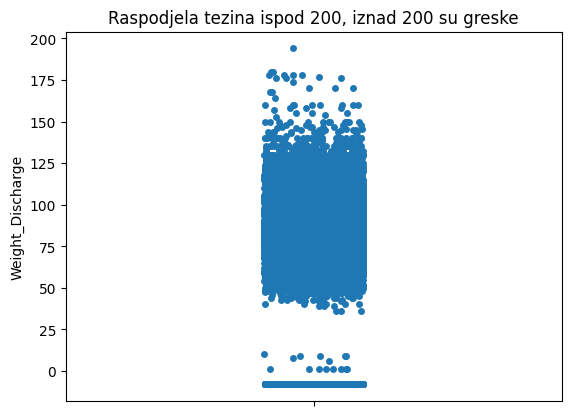

In [50]:
sns.stripplot(y='Weight_Discharge', data=df[df.Weight_Discharge <= 200])
plt.title('Raspodjela tezina ispod 200, iznad 200 su greske')
plt.show()

In [117]:
df[(df.Weight_Discharge < 25) & (df.Weight_Discharge > 0)]

,AdmissionDx,AdmissionType,PreviousAdmissionDays,LOS,Age_Group,Gender,Surgery_Count,LOS_ICU,Discharge_Specialty,Dx_Discharge,Discharge_Status,Weight_Discharge,Height_Discharge,Education,Current_Work_Status,Label,acarbose_count,acetylsalicylic_acid_count,aciclovir_count,albumin_count,allopurinol_count,alprazolam_count,alprostadil_count,aminophylline_count,amiodarone_count,amlodipine_count,amoxicillin_count,amoxicillin_and_betalactamase_inhibitor_count,ampicillin_count,ampicillin_and_betalactamase_inhibitor_count,apixaban_count,atenolol_count,atorvastatin_count,atropine_count,azithromycin_count,b03aa07_count,benzathine_benzylpenicillin_count,betamethasone_count,bisoprolol_count,bromazepam_count,butylscopolamine_count,calcium_chloride_count,carbamazepine_count,carbohydrates_count,carvedilol_count,cefalexin_count,cefazolin_count,cefepime_count,ceftazidime_count,ceftazidime_and_betalactamase_inhibitor_count,ceftriaxone_count,cefuroxime_count,chloramphenicol_count,chlorhexidine_count,chloropyramine_count,ciprofloxacin_count,clindamycin_count,clonazepam_count,clopidogrel_count,clotrimazole_count,coagulation_factor_ix_ii_vii_and_x_in_combination_count,coagulation_factor_viia_count,colchicine_count,colecalciferol_count,colistin_count,combinations_count,dabigatran_etexilate_count,dapagliflozin_count,dexamethasone_count,dexamethasone_and_antiinfectives_count,dexmedetomidine_count,diazepam_count,diclofenac_count,diltiazem_count,dobutamine_count,doxazosin_count,electrolytes_count,empagliflozin_count,enoxaparin_count,epinephrine_count,eplerenone_count,erythromycin_count,escitalopram_count,esomeprazole_count,etomidate_count,exemestane_count,fentanyl_count,ferric_oxide_polymaltose_complexes_count,ferrous_fumarate_count,flucloxacillin_count,fluconazole_count,flumazenil_count,folic_acid_count,fondaparinux_count,fosfomycin_count,furosemide_count,gentamicin_count,gliclazide_count,glimepiride_count,gliquidone_count,glyceryl_trinitrate_count,haloperidol_count,heparin_count,hydrocortisone_count,ibuprofen_count,indapamide_count,indometacin_count,insulin_aspart_count,insulin_glargine_count,insulin_human_count,iodixanol_count,iohexol_count,ipratropium_bromide_count,isosorbide_dinitrate_count,isosorbide_mononitrate_count,ivabradine_count,ketamine_count,ketoprofen_count,lacidipine_count,lactulose_count,lamotrigine_count,lercanidipine_count,levetiracetam_count,levobupivacaine_count,levodopa_and_decarboxylase_inhibitor_count,levofloxacin_count,levothyroxine_sodium_count,lidocaine_count,linagliptin_count,linezolid_count,lisinopril_count,loperamide_count,loratadine_count,lorazepam_count,losartan_count,losartan_and_diuretics_count,macrogol_combinations_count,mannitol_count,memantine_count,meropenem_count,mesalazine_count,metamizole_sodium_count,metformin_count,metformin_and_alogliptin_count,metformin_and_empagliflozin_count,metformin_and_vildagliptin_count,methylphenobarbital_count,methylprednisolone_count,metildigoxin_count,metoclopramide_count,metoprolol_count,metronidazole_count,miconazole_count,midazolam_count,mirtazapine_count,mometasone_count,montelukast_count,morphine_count,moxifloxacin_count,moxonidine_count,mupirocin_count,n02bf01_count,n02bf02_count,nadroparin_count,naloxone_count,nebivolol_count,neostigmine_count,nitrazepam_count,nitrofurantoin_count,norepinephrine_count,norfloxacin_count,octreotide_count,omega3triglycerides_incl_other_esters_and_acids_count,ondansetron_count,organoheparinoid_count,oseltamivir_count,oxazepam_count,pantoprazole_count,paracetamol_count,paroxetine_count,perindopril_count,perindopril_amlodipine_and_indapamide_count,perindopril_and_amlodipine_count,perindopril_and_diuretics_count,pethidine_count,phenobarbital_count,pholcodine_count,phytomenadione_count,piperacillin_and_betalactamase_inhibitor_count,potassium_chloride_count,potassium_different_salts_in_combination_count,prasugrel_count,prednisone_count,promazine_count,propafenone_count,propofol_count,protamine_count,quetiapine_count,rabeprazole_count,ramipril_count,ramip

Sve oko su krive tezine, cak i da su patuljici nema sanse da imaju ovoliko kila. 

In [119]:
df[df.Weight_Discharge > 190]

,AdmissionDx,AdmissionType,PreviousAdmissionDays,LOS,Age_Group,Gender,Surgery_Count,LOS_ICU,Discharge_Specialty,Dx_Discharge,Discharge_Status,Weight_Discharge,Height_Discharge,Education,Current_Work_Status,Label,acarbose_count,acetylsalicylic_acid_count,aciclovir_count,albumin_count,allopurinol_count,alprazolam_count,alprostadil_count,aminophylline_count,amiodarone_count,amlodipine_count,amoxicillin_count,amoxicillin_and_betalactamase_inhibitor_count,ampicillin_count,ampicillin_and_betalactamase_inhibitor_count,apixaban_count,atenolol_count,atorvastatin_count,atropine_count,azithromycin_count,b03aa07_count,benzathine_benzylpenicillin_count,betamethasone_count,bisoprolol_count,bromazepam_count,butylscopolamine_count,calcium_chloride_count,carbamazepine_count,carbohydrates_count,carvedilol_count,cefalexin_count,cefazolin_count,cefepime_count,ceftazidime_count,ceftazidime_and_betalactamase_inhibitor_count,ceftriaxone_count,cefuroxime_count,chloramphenicol_count,chlorhexidine_count,chloropyramine_count,ciprofloxacin_count,clindamycin_count,clonazepam_count,clopidogrel_count,clotrimazole_count,coagulation_factor_ix_ii_vii_and_x_in_combination_count,coagulation_factor_viia_count,colchicine_count,colecalciferol_count,colistin_count,combinations_count,dabigatran_etexilate_count,dapagliflozin_count,dexamethasone_count,dexamethasone_and_antiinfectives_count,dexmedetomidine_count,diazepam_count,diclofenac_count,diltiazem_count,dobutamine_count,doxazosin_count,electrolytes_count,empagliflozin_count,enoxaparin_count,epinephrine_count,eplerenone_count,erythromycin_count,escitalopram_count,esomeprazole_count,etomidate_count,exemestane_count,fentanyl_count,ferric_oxide_polymaltose_complexes_count,ferrous_fumarate_count,flucloxacillin_count,fluconazole_count,flumazenil_count,folic_acid_count,fondaparinux_count,fosfomycin_count,furosemide_count,gentamicin_count,gliclazide_count,glimepiride_count,gliquidone_count,glyceryl_trinitrate_count,haloperidol_count,heparin_count,hydrocortisone_count,ibuprofen_count,indapamide_count,indometacin_count,insulin_aspart_count,insulin_glargine_count,insulin_human_count,iodixanol_count,iohexol_count,ipratropium_bromide_count,isosorbide_dinitrate_count,isosorbide_mononitrate_count,ivabradine_count,ketamine_count,ketoprofen_count,lacidipine_count,lactulose_count,lamotrigine_count,lercanidipine_count,levetiracetam_count,levobupivacaine_count,levodopa_and_decarboxylase_inhibitor_count,levofloxacin_count,levothyroxine_sodium_count,lidocaine_count,linagliptin_count,linezolid_count,lisinopril_count,loperamide_count,loratadine_count,lorazepam_count,losartan_count,losartan_and_diuretics_count,macrogol_combinations_count,mannitol_count,memantine_count,meropenem_count,mesalazine_count,metamizole_sodium_count,metformin_count,metformin_and_alogliptin_count,metformin_and_empagliflozin_count,metformin_and_vildagliptin_count,methylphenobarbital_count,methylprednisolone_count,metildigoxin_count,metoclopramide_count,metoprolol_count,metronidazole_count,miconazole_count,midazolam_count,mirtazapine_count,mometasone_count,montelukast_count,morphine_count,moxifloxacin_count,moxonidine_count,mupirocin_count,n02bf01_count,n02bf02_count,nadroparin_count,naloxone_count,nebivolol_count,neostigmine_count,nitrazepam_count,nitrofurantoin_count,norepinephrine_count,norfloxacin_count,octreotide_count,omega3triglycerides_incl_other_esters_and_acids_count,ondansetron_count,organoheparinoid_count,oseltamivir_count,oxazepam_count,pantoprazole_count,paracetamol_count,paroxetine_count,perindopril_count,perindopril_amlodipine_and_indapamide_count,perindopril_and_amlodipine_count,perindopril_and_diuretics_count,pethidine_count,phenobarbital_count,pholcodine_count,phytomenadione_count,piperacillin_and_betalactamase_inhibitor_count,potassium_chloride_count,potassium_different_salts_in_combination_count,prasugrel_count,prednisone_count,promazine_count,propafenone_count,propofol_count,protamine_count,quetiapine_count,rabeprazole_count,ramipril_count,ramip

In [120]:
df[df.Weight_Discharge > 25].Weight_Discharge.min()

36.0

In [136]:
df_test[df_test.Weight_Discharge > 25].Weight_Discharge.min()

33.0

Normalni rasponi tezina u nasem datasetu su [36, 194]

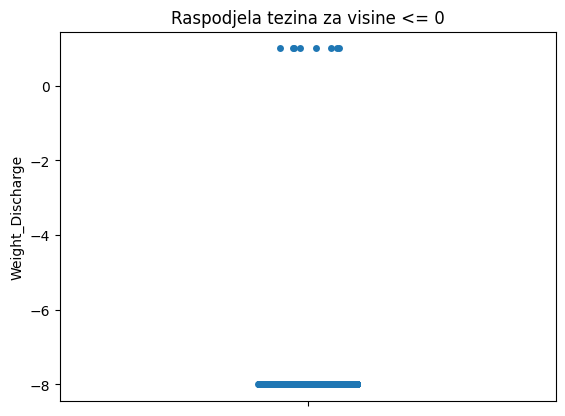

In [57]:
sns.stripplot(y='Weight_Discharge', data=df[df.Height_Discharge <= 0])
plt.title('Raspodjela tezina za visine <= 0')
plt.show()

Ovo su retci s krivo unesenom tezinom:

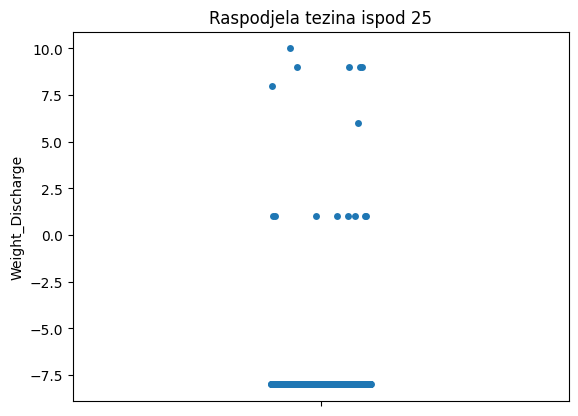

In [51]:
sns.stripplot(y='Weight_Discharge', data=df[df.Weight_Discharge < 25])
plt.title('Raspodjela tezina ispod 25')
plt.show()

In [52]:
df[(df.Weight_Discharge > 0) & (df.Weight_Discharge < 20)]

,AdmissionDx,AdmissionType,PreviousAdmissionDays,LOS,Age_Group,Gender,Surgery_Count,LOS_ICU,Discharge_Specialty,Dx_Discharge,Discharge_Status,Weight_Discharge,Height_Discharge,Education,Current_Work_Status,Label,acarbose_count,acetylsalicylic_acid_count,aciclovir_count,albumin_count,allopurinol_count,alprazolam_count,alprostadil_count,aminophylline_count,amiodarone_count,amlodipine_count,amoxicillin_count,amoxicillin_and_betalactamase_inhibitor_count,ampicillin_count,ampicillin_and_betalactamase_inhibitor_count,apixaban_count,atenolol_count,atorvastatin_count,atropine_count,azithromycin_count,b03aa07_count,benzathine_benzylpenicillin_count,betamethasone_count,bisoprolol_count,bromazepam_count,butylscopolamine_count,calcium_chloride_count,carbamazepine_count,carbohydrates_count,carvedilol_count,cefalexin_count,cefazolin_count,cefepime_count,ceftazidime_count,ceftazidime_and_betalactamase_inhibitor_count,ceftriaxone_count,cefuroxime_count,chloramphenicol_count,chlorhexidine_count,chloropyramine_count,ciprofloxacin_count,clindamycin_count,clonazepam_count,clopidogrel_count,clotrimazole_count,coagulation_factor_ix_ii_vii_and_x_in_combination_count,coagulation_factor_viia_count,colchicine_count,colecalciferol_count,colistin_count,combinations_count,dabigatran_etexilate_count,dapagliflozin_count,dexamethasone_count,dexamethasone_and_antiinfectives_count,dexmedetomidine_count,diazepam_count,diclofenac_count,diltiazem_count,dobutamine_count,doxazosin_count,electrolytes_count,empagliflozin_count,enoxaparin_count,epinephrine_count,eplerenone_count,erythromycin_count,escitalopram_count,esomeprazole_count,etomidate_count,exemestane_count,fentanyl_count,ferric_oxide_polymaltose_complexes_count,ferrous_fumarate_count,flucloxacillin_count,fluconazole_count,flumazenil_count,folic_acid_count,fondaparinux_count,fosfomycin_count,furosemide_count,gentamicin_count,gliclazide_count,glimepiride_count,gliquidone_count,glyceryl_trinitrate_count,haloperidol_count,heparin_count,hydrocortisone_count,ibuprofen_count,indapamide_count,indometacin_count,insulin_aspart_count,insulin_glargine_count,insulin_human_count,iodixanol_count,iohexol_count,ipratropium_bromide_count,isosorbide_dinitrate_count,isosorbide_mononitrate_count,ivabradine_count,ketamine_count,ketoprofen_count,lacidipine_count,lactulose_count,lamotrigine_count,lercanidipine_count,levetiracetam_count,levobupivacaine_count,levodopa_and_decarboxylase_inhibitor_count,levofloxacin_count,levothyroxine_sodium_count,lidocaine_count,linagliptin_count,linezolid_count,lisinopril_count,loperamide_count,loratadine_count,lorazepam_count,losartan_count,losartan_and_diuretics_count,macrogol_combinations_count,mannitol_count,memantine_count,meropenem_count,mesalazine_count,metamizole_sodium_count,metformin_count,metformin_and_alogliptin_count,metformin_and_empagliflozin_count,metformin_and_vildagliptin_count,methylphenobarbital_count,methylprednisolone_count,metildigoxin_count,metoclopramide_count,metoprolol_count,metronidazole_count,miconazole_count,midazolam_count,mirtazapine_count,mometasone_count,montelukast_count,morphine_count,moxifloxacin_count,moxonidine_count,mupirocin_count,n02bf01_count,n02bf02_count,nadroparin_count,naloxone_count,nebivolol_count,neostigmine_count,nitrazepam_count,nitrofurantoin_count,norepinephrine_count,norfloxacin_count,octreotide_count,omega3triglycerides_incl_other_esters_and_acids_count,ondansetron_count,organoheparinoid_count,oseltamivir_count,oxazepam_count,pantoprazole_count,paracetamol_count,paroxetine_count,perindopril_count,perindopril_amlodipine_and_indapamide_count,perindopril_and_amlodipine_count,perindopril_and_diuretics_count,pethidine_count,phenobarbital_count,pholcodine_count,phytomenadione_count,piperacillin_and_betalactamase_inhibitor_count,potassium_chloride_count,potassium_different_salts_in_combination_count,prasugrel_count,prednisone_count,promazine_count,propafenone_count,propofol_count,protamine_count,quetiapine_count,rabeprazole_count,ramipril_count,ramip

Sve ove osobe gore imaju krivu tezinu. Zamijeniti srednjom vrijednosti za njihov spol i age range?

<Axes: ylabel='Weight_Discharge'>

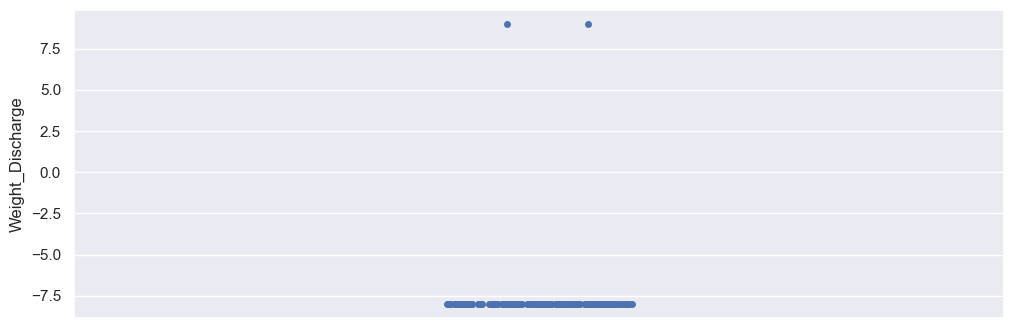

In [112]:
sns.stripplot(y='Weight_Discharge', data=df_test[df_test.Weight_Discharge < 25])

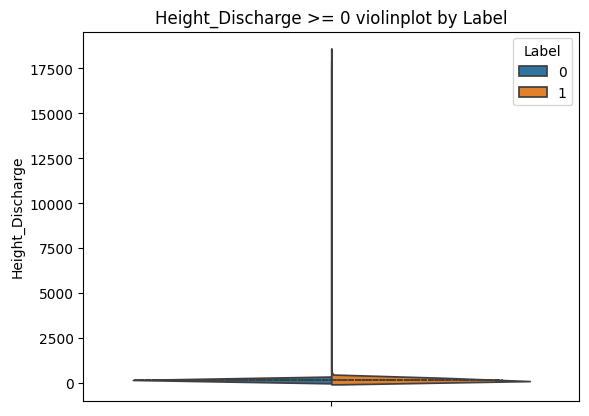

In [29]:
sns.violinplot(data=df[(df.Height_Discharge >= 0)], y='Height_Discharge', hue="Label", split=True, inner="quart")
plt.title(f'Height_Discharge >= 0 violinplot by Label')
plt.show()

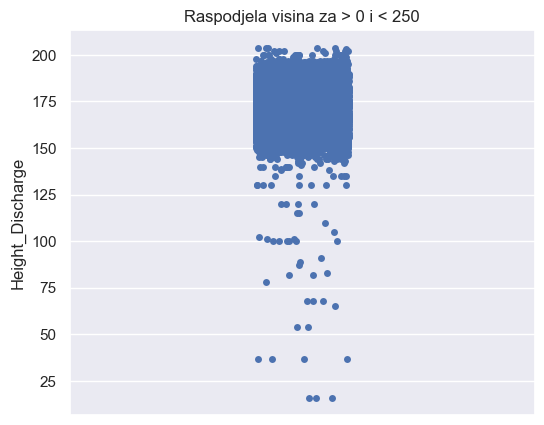

In [129]:
sns.set(rc={'figure.figsize':(6,5)})
sns.stripplot(y='Height_Discharge', data=df[(df.Height_Discharge < 250) & (df.Height_Discharge > 0)])
plt.title('Raspodjela visina za > 0 i < 250')
plt.show()

In [126]:
df[df.Height_Discharge < 250].Height_Discharge.max()

204.0

In [135]:
df_test[df_test.Height_Discharge < 250].Height_Discharge.max()

201.0

204 je gornja granica za normalnu visinu, i za ovu varijablu ima puno -8ica, no teze je odrediti normalnu doljnju granicu.

In [134]:
df[(df.Height_Discharge < 140) & (df.Height_Discharge > 110)]

,AdmissionDx,AdmissionType,PreviousAdmissionDays,LOS,Age_Group,Gender,Surgery_Count,LOS_ICU,Discharge_Specialty,Dx_Discharge,Discharge_Status,Weight_Discharge,Height_Discharge,Education,Current_Work_Status,Label,acarbose_count,acetylsalicylic_acid_count,aciclovir_count,albumin_count,allopurinol_count,alprazolam_count,alprostadil_count,aminophylline_count,amiodarone_count,amlodipine_count,amoxicillin_count,amoxicillin_and_betalactamase_inhibitor_count,ampicillin_count,ampicillin_and_betalactamase_inhibitor_count,apixaban_count,atenolol_count,atorvastatin_count,atropine_count,azithromycin_count,b03aa07_count,benzathine_benzylpenicillin_count,betamethasone_count,bisoprolol_count,bromazepam_count,butylscopolamine_count,calcium_chloride_count,carbamazepine_count,carbohydrates_count,carvedilol_count,cefalexin_count,cefazolin_count,cefepime_count,ceftazidime_count,ceftazidime_and_betalactamase_inhibitor_count,ceftriaxone_count,cefuroxime_count,chloramphenicol_count,chlorhexidine_count,chloropyramine_count,ciprofloxacin_count,clindamycin_count,clonazepam_count,clopidogrel_count,clotrimazole_count,coagulation_factor_ix_ii_vii_and_x_in_combination_count,coagulation_factor_viia_count,colchicine_count,colecalciferol_count,colistin_count,combinations_count,dabigatran_etexilate_count,dapagliflozin_count,dexamethasone_count,dexamethasone_and_antiinfectives_count,dexmedetomidine_count,diazepam_count,diclofenac_count,diltiazem_count,dobutamine_count,doxazosin_count,electrolytes_count,empagliflozin_count,enoxaparin_count,epinephrine_count,eplerenone_count,erythromycin_count,escitalopram_count,esomeprazole_count,etomidate_count,exemestane_count,fentanyl_count,ferric_oxide_polymaltose_complexes_count,ferrous_fumarate_count,flucloxacillin_count,fluconazole_count,flumazenil_count,folic_acid_count,fondaparinux_count,fosfomycin_count,furosemide_count,gentamicin_count,gliclazide_count,glimepiride_count,gliquidone_count,glyceryl_trinitrate_count,haloperidol_count,heparin_count,hydrocortisone_count,ibuprofen_count,indapamide_count,indometacin_count,insulin_aspart_count,insulin_glargine_count,insulin_human_count,iodixanol_count,iohexol_count,ipratropium_bromide_count,isosorbide_dinitrate_count,isosorbide_mononitrate_count,ivabradine_count,ketamine_count,ketoprofen_count,lacidipine_count,lactulose_count,lamotrigine_count,lercanidipine_count,levetiracetam_count,levobupivacaine_count,levodopa_and_decarboxylase_inhibitor_count,levofloxacin_count,levothyroxine_sodium_count,lidocaine_count,linagliptin_count,linezolid_count,lisinopril_count,loperamide_count,loratadine_count,lorazepam_count,losartan_count,losartan_and_diuretics_count,macrogol_combinations_count,mannitol_count,memantine_count,meropenem_count,mesalazine_count,metamizole_sodium_count,metformin_count,metformin_and_alogliptin_count,metformin_and_empagliflozin_count,metformin_and_vildagliptin_count,methylphenobarbital_count,methylprednisolone_count,metildigoxin_count,metoclopramide_count,metoprolol_count,metronidazole_count,miconazole_count,midazolam_count,mirtazapine_count,mometasone_count,montelukast_count,morphine_count,moxifloxacin_count,moxonidine_count,mupirocin_count,n02bf01_count,n02bf02_count,nadroparin_count,naloxone_count,nebivolol_count,neostigmine_count,nitrazepam_count,nitrofurantoin_count,norepinephrine_count,norfloxacin_count,octreotide_count,omega3triglycerides_incl_other_esters_and_acids_count,ondansetron_count,organoheparinoid_count,oseltamivir_count,oxazepam_count,pantoprazole_count,paracetamol_count,paroxetine_count,perindopril_count,perindopril_amlodipine_and_indapamide_count,perindopril_and_amlodipine_count,perindopril_and_diuretics_count,pethidine_count,phenobarbital_count,pholcodine_count,phytomenadione_count,piperacillin_and_betalactamase_inhibitor_count,potassium_chloride_count,potassium_different_salts_in_combination_count,prasugrel_count,prednisone_count,promazine_count,propafenone_count,propofol_count,protamine_count,quetiapine_count,rabeprazole_count,ramipril_count,ramip

In [110]:
(df[df.Label == 1].Weight_Discharge == -8).value_counts(normalize=True)

Weight_Discharge
False    0.907407
True     0.092593
Name: proportion, dtype: float64

In [111]:
(df[df.Label == 1].Height_Discharge == -8).value_counts(normalize=True)

Height_Discharge
False    0.906878
True     0.093122
Name: proportion, dtype: float64

I kod Height_Discharge i Weight_Discharge -8 signalizira veću prisutnost rehospitalizacija no ne toliko kao kod PreviousAdmissionDays.

## Plan za dalje

- One-hot enkodirati kategorijeske varijable, odbaciti dobivene kolone za vrijednosti s malom frekvencijom
- ispraviti / izbaciti retke s krivim vrijednostima (npr. visina preko 1000cm)
- dob transformirati u numericku varijablu
- numericke varijable normalizirati
- osmisliti neku filter metodu za izbaciti jako ocito neinformative / monotone feature-e
- napraviti forward ili backward feature selection s random forestom, mozda cak prvo rucno pronaci dobre parametre za random forest
- na dobivenom feature set-om napraviti grid search i naci najbolji model
- najbolji model iztrenirati na cjelom datasetu i generirati predikcije i uploadati ih 

In [61]:
numerical_cols

['PreviousAdmissionDays',
 'LOS',
 'Surgery_Count',
 'LOS_ICU',
 'Weight_Discharge',
 'Height_Discharge']

In [65]:
df_test.Age_Group.value_counts(dropna=False, normalize=True)

Age_Group
68-72    0.190431
73-77    0.187159
63-67    0.166439
78-82    0.104280
58-62    0.104008
53-57    0.079198
83-87    0.047574
48-52    0.044984
43-47    0.027399
38-42    0.014995
88-92    0.009815
33-37    0.009678
28-32    0.007497
23-27    0.003680
18-22    0.001908
93-97    0.000954
Name: proportion, dtype: float64

### Plan za numericke varijable:
- Age_Group nije numericka no poredat cemo grupe od 1 do n i onda normalizirati na mean=0 i std=1. U Age_Group nema NaN vrijednosti tako da ne trebamo se brinuti oko imputaciji
- PreviousAdmissionDays
    -  Skoro pola redaka ima vrijednost -8. Mislim da to vjerojatno znači da -8 signalizira da ne postoji prijašnja hospitalizacija. Međutim gotovi svi rehospitalizirani pacjenti imaju vrijednost -8. U svakom slučaju na forumu pitati koje je značenje ove vrijednosti. Jako je bitno da se pri normalizaciji ove varijable ne izgubi informacija o -8 vrijednosti primjerice zamjenom medijanom. Ako vrijednost nije -8 to je jak signal da redak ima Label=0.
    -  Ne postoje NaN vrijednosti, dakle plan bi mogao biti sljedeci: -8 zamjenimo medijanom i normaliziramo ali dodatno kreiramo dodatnu dummy varijablu PreviousAdmissionDays == -8.
- LOS se čini OK samo treba biti normaliziran
- Surgery_Count se čini OK samo treba biti normaliziran
- LOS_ICU se čini OK samo treba biti normaliziran
- Weight_Discharge
    - Normalni rasponi tezina u nasem datasetu su [36, 194] mozda 33 jer je 33 u test setu najmanja veca od 25
    - u tom rasponu izracunamo medijan tezine i imputiramo vrijednost=-8 ili vrjednosti izvan raspona
    - mislim da je oke ne stvarati dummy varijablu za one s -8 jer incidencija rehospitalizacija nije previse izrazena iako postoji, o ovom odluci nakon sto dobijes odgovor na forumu 
- Height_Discharge
    - Normalni rasponi tezina u nasem datasetu su [?, 204] zeznuto je jer mozda postoje dwarfovi
    - u tom rasponu izracunamo medijan visine i imputiramo vrijednost=-8 ili vrjednosti izvan raspona
    - mislim da je oke ne stvarati dummy varijablu za one s -8 jer incidencija rehospitalizacija nije previse izrazena iako
    - mozda bi trebali zanemariti dwarfizam, i ne uzeti ga u ubzir za normalni raspon. Time bismo sve dawrfove preslikali u raspon normalnih visina i tezina. Mozda je to oke s cisto predikcijskog gledista